# Reinforcement Learning - Clase Completa

## Índice
1. [Introducción al Reinforcement Learning](#1-introducción)
2. [Conceptos Fundamentales](#2-conceptos)
3. [El Framework Agente-Entorno](#3-framework)
4. [Proceso de Decisión de Markov (MDP)](#4-mdp)
5. [Políticas y Funciones de Valor](#5-politicas)
6. [Q-Learning: Tu Primer Algoritmo](#6-qlearning)
7. [Deep Q-Network (DQN)](#7-dqn)
8. [Gymnasium: Entornos de RL](#8-gymnasium)
9. [Práctica Final](#9-practica)

---

## Instalación de Dependencias

Ejecuta esta celda para instalar las librerías necesarias:

In [1]:
# Instalar dependencias (ejecutar solo si es necesario)
# Descomenta la línea siguiente si te faltan librerías:

!pip install gymnasium numpy matplotlib torch -q

print("✅ Dependencias instaladas")

✅ Dependencias instaladas



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports generales que usaremos
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from IPython.display import clear_output
import time

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    try:
        plt.style.use('seaborn-whitegrid')
    except:
        pass  # Usar estilo por defecto

%matplotlib inline

print("✅ Imports cargados correctamente")

✅ Imports cargados correctamente


## ¿Qué es el Reinforcement Learning?

El **Reinforcement Learning (RL)** o **Aprendizaje por Refuerzo** es un paradigma de Machine Learning donde un **agente** aprende a tomar decisiones interactuando con un **entorno**.

### ¿Por qué es diferente a otros tipos de ML?

A diferencia del aprendizaje supervisado (donde tenemos las respuestas correctas) o el no supervisado (donde buscamos patrones), en RL:

- **No hay un "profesor"** que diga qué acción es correcta
- El agente debe **descubrir** qué acciones son buenas mediante **prueba y error**
- Las consecuencias de una acción pueden no verse **inmediatamente** (recompensas retrasadas)
- Las acciones afectan no solo la recompensa inmediata, sino también **situaciones futuras**

### Aplicaciones Reales del RL

| Área | Aplicación | Ejemplo Real |
|------|------------|--------------|
| 🎮 Videojuegos | IA que supera humanos | AlphaGo (venció al campeón mundial de Go), OpenAI Five (Dota 2) |
| 🤖 Robótica | Control de movimiento | Robots cuadrúpedos de Boston Dynamics, brazos robóticos industriales |
| 🚗 Vehículos | Conducción autónoma | Tesla Autopilot, Waymo |
| 💰 Finanzas | Trading algorítmico | Gestión automática de portfolios de inversión |
| 🏭 Industria | Optimización de procesos | Google redujo 40% el consumo energético de sus data centers con RL |
| 🎯 Recomendaciones | Sistemas adaptativos | Netflix, YouTube, Spotify adaptan sus recomendaciones |
| 💊 Medicina | Tratamientos personalizados | Dosificación óptima de medicamentos |

### Los Tres Paradigmas del Machine Learning

| Paradigma | Datos | Objetivo | Ejemplo |
|-----------|-------|----------|----------|
| **Supervisado** | Etiquetados (X, y) | Predecir etiquetas | Clasificar imágenes de gatos/perros |
| **No Supervisado** | Sin etiquetar (X) | Encontrar patrones | Agrupar clientes por comportamiento |
| **Refuerzo** | Experiencia (s, a, r, s') | Maximizar recompensa acumulada | Aprender a jugar ajedrez |

### Analogía Detallada: Aprender a Caminar

Imagina un bebé aprendiendo a caminar. Esta es la analogía perfecta para entender RL:

| Concepto RL | En el bebé | Explicación |
|-------------|------------|-------------|
| **Agente** | El bebé | El que toma decisiones y actúa |
| **Entorno** | El mundo físico | Suelo, gravedad, obstáculos, muebles |
| **Estado** | Posición y equilibrio | ¿Está de pie? ¿Inclinado? ¿Cayendo? |
| **Acciones** | Movimientos | Mover pierna izq/der, inclinarse, apoyarse |
| **Recompensa (+)** | Dar un paso sin caer | Sensación de logro, avance hacia objetivo |
| **Recompensa (-)** | Caerse | Dolor, frustración |
| **Política** | Estrategia aprendida | "Si me inclino mucho, debo mover la pierna" |

**Punto clave**: El bebé **no tiene un manual** de instrucciones. Nadie le dice "contrae el músculo X al 47%". Aprende por **experiencia directa**: intenta algo, ve qué pasa, y ajusta su estrategia.

### El Ciclo del RL: El Corazón del Aprendizaje

Este diagrama representa la interacción fundamental que ocurre **en cada paso de tiempo**:

```
    ┌─────────────────────────────────────────────────────────┐
    │                                                         │
    │   ┌─────────┐         Acción (aₜ)         ┌─────────┐   │
    │   │         │ ──────────────────────────▶ │         │   │
    │   │  AGENTE │                             │ ENTORNO │   │
    │   │         │ ◀────────────────────────── │         │   │
    │   └─────────┘   Estado (sₜ₊₁), Recompensa (rₜ₊₁)  └─────────┘   │
    │                                                         │
    └─────────────────────────────────────────────────────────┘
```

### Paso a Paso del Ciclo

| Paso | Descripción | Ejemplo (Robot limpiador) |
|------|-------------|---------------------------|
| 1️⃣ | **Observar**: El agente observa el estado actual | "Estoy en la cocina, hay suciedad al norte" |
| 2️⃣ | **Decidir**: Según su política, elige una acción | "Mi política dice: si hay suciedad cerca, ir hacia ella" |
| 3️⃣ | **Actuar**: Ejecuta la acción en el entorno | Moverse hacia el norte |
| 4️⃣ | **Transición**: El entorno cambia de estado | El robot ahora está sobre la suciedad |
| 5️⃣ | **Recompensa**: El entorno da feedback numérico | +10 por llegar a la suciedad |
| 6️⃣ | **Aprender**: El agente actualiza su conocimiento | "Moverme hacia suciedad da buena recompensa" |
| 🔄 | **Repetir** hasta alcanzar el objetivo o límite | Continuar hasta limpiar toda la casa |

### ¿Por qué este ciclo es tan poderoso?

1. **Generalidad**: Este mismo ciclo funciona para jugar ajedrez, conducir coches, o controlar robots
2. **Adaptabilidad**: El agente mejora con cada iteración del ciclo
3. **Autonomía**: No necesita supervisión humana constante, aprende solo
4. **Optimización**: Busca automáticamente la mejor estrategia posible

In [3]:
# EJEMPLO PRÁCTICO 1: Simulación Simple del Ciclo RL
# =====================================================
# Este ejemplo muestra el bucle fundamental de RL:
# Agente observa estado → elige acción → recibe recompensa → repite

import random  # Para decisiones aleatorias del agente

class EntornoSimple:
    """
    Entorno minimalista: el agente debe moverse hacia la derecha.

    Estados: posición del agente (0 a 4)
    Acciones: 0 = izquierda, 1 = derecha
    Meta: llegar a posición 4
    """

    def __init__(self):
        # Inicializamos el agente en posición 0 (extremo izquierdo)
        self.estado = 0

    def reset(self):
        """Reinicia el entorno al estado inicial."""
        self.estado = 0  # Volver al inicio
        return self.estado  # Devolver el estado para que el agente lo observe

    def step(self, accion):
        """
        Ejecuta una acción y devuelve el resultado.

        Args:
            accion: 0 (izquierda) o 1 (derecha)

        Returns:
            nuevo_estado: posición actualizada
            recompensa: señal de feedback (+10 al llegar, -1 por paso)
            terminado: True si llegó a la meta
        """
        # Ejecutar la acción: mover izquierda o derecha
        if accion == 0:  # Izquierda
            self.estado = max(0, self.estado - 1)  # No salir del límite izquierdo
        else:  # Derecha
            self.estado = min(4, self.estado + 1)  # No salir del límite derecho

        # Calcular recompensa según el resultado
        if self.estado == 4:  # ¡Llegó a la meta!
            recompensa = 10   # Recompensa alta por completar el objetivo
            terminado = True  # El episodio termina
        else:
            recompensa = -1   # Pequeño castigo por cada paso (incentiva rapidez)
            terminado = False # El episodio continúa

        return self.estado, recompensa, terminado


class AgenteAleatorio:
    """
    Agente que elige acciones al azar.
    Sirve como baseline: ¿qué tan bien lo hace sin aprender?
    """

    def elegir_accion(self, estado):
        """
        Selecciona una acción aleatoria.

        En RL real, aquí iría la lógica de la política.
        Este agente ignora el estado y elige al azar.
        """
        # 50% probabilidad de ir a izquierda o derecha
        return random.choice([0, 1])


def ejecutar_episodio(entorno, agente, max_pasos=20):
    """
    Ejecuta un episodio completo del ciclo RL.

    Un episodio = desde el estado inicial hasta llegar a la meta
    (o hasta agotar el máximo de pasos).
    """
    # 1. RESET: Obtener estado inicial
    estado = entorno.reset()

    recompensa_total = 0  # Acumular recompensas del episodio
    historial = []        # Guardar la trayectoria para análisis

    # 2. BUCLE PRINCIPAL DEL RL
    for paso in range(max_pasos):
        # 2a. OBSERVAR: El agente ve el estado actual
        # 2b. DECIDIR: El agente elige una acción según su política
        accion = agente.elegir_accion(estado)

        # 2c. ACTUAR: El entorno ejecuta la acción
        # 2d. RECIBIR FEEDBACK: El entorno devuelve nuevo estado y recompensa
        nuevo_estado, recompensa, terminado = entorno.step(accion)

        # Guardar esta transición (s, a, r, s') para análisis
        historial.append({
            'paso': paso + 1,
            'estado': estado,
            'accion': 'izquierda' if accion == 0 else 'derecha',
            'recompensa': recompensa,
            'nuevo_estado': nuevo_estado
        })

        # Acumular recompensa total del episodio
        recompensa_total += recompensa

        # Preparar siguiente iteración
        estado = nuevo_estado

        # 2e. VERIFICAR: ¿Terminó el episodio?
        if terminado:
            break

    return recompensa_total, historial


# === EJECUTAR LA SIMULACIÓN ===
print("=" * 60)
print("SIMULACIÓN DEL CICLO RL")
print("=" * 60)

# Crear el entorno y el agente
entorno = EntornoSimple()
agente = AgenteAleatorio()

# Ejecutar un episodio y mostrar paso a paso
recompensa, historial = ejecutar_episodio(entorno, agente)

print("\nTrayectoria del agente:")
print("-" * 50)
for h in historial:
    print(f"Paso {h['paso']:2d}: Estado {h['estado']} → {h['accion']:>9s} → "
          f"Estado {h['nuevo_estado']} (R={h['recompensa']:+3d})")

print("-" * 50)
print(f"Recompensa total del episodio: {recompensa}")
print(f"Número de pasos: {len(historial)}")

# Ejecutar múltiples episodios para ver la variabilidad
print("\n" + "=" * 60)
print("ESTADÍSTICAS DE 100 EPISODIOS")
print("=" * 60)

recompensas = []
for _ in range(100):
    r, _ = ejecutar_episodio(entorno, agente)
    recompensas.append(r)

print(f"Recompensa promedio: {np.mean(recompensas):.2f}")
print(f"Recompensa mínima:   {min(recompensas)}")
print(f"Recompensa máxima:   {max(recompensas)}")
print(f"\n💡 Un agente que APRENDE debería mejorar estas estadísticas")

SIMULACIÓN: Agente Aleatorio
Estado: |A|_|_|_|_|M| Posición: 0

Paso 1: Acción = ← Izquierda
Estado: |A|_|_|_|_|M| Posición: 0
Recompensa: -1 | Total: -1

Paso 2: Acción = → Derecha
Estado: |_|A|_|_|_|M| Posición: 1
Recompensa: -1 | Total: -2

Paso 3: Acción = ← Izquierda
Estado: |A|_|_|_|_|M| Posición: 0
Recompensa: -1 | Total: -3

Paso 4: Acción = ← Izquierda
Estado: |A|_|_|_|_|M| Posición: 0
Recompensa: -1 | Total: -4

Paso 5: Acción = → Derecha
Estado: |_|A|_|_|_|M| Posición: 1
Recompensa: -1 | Total: -5

Paso 6: Acción = ← Izquierda
Estado: |A|_|_|_|_|M| Posición: 0
Recompensa: -1 | Total: -6

Paso 7: Acción = → Derecha
Estado: |_|A|_|_|_|M| Posición: 1
Recompensa: -1 | Total: -7

Paso 8: Acción = → Derecha
Estado: |_|_|A|_|_|M| Posición: 2
Recompensa: -1 | Total: -8

Paso 9: Acción = ← Izquierda
Estado: |_|A|_|_|_|M| Posición: 1
Recompensa: -1 | Total: -9

Paso 10: Acción = ← Izquierda
Estado: |A|_|_|_|_|M| Posición: 0
Recompensa: -1 | Total: -10

Paso 11: Acción = → Derecha
Esta

### Preguntas para Reflexionar

**Después de observar al agente aleatorio:**

1. **Eficiencia**: ¿Cuántos pasos tomó el agente aleatorio? ¿Cuál sería el mínimo posible?
   - Respuesta: El mínimo es **5 pasos** (siempre ir a la derecha)
   
2. **Recompensa**: ¿Por qué la recompensa total es negativa a pesar de obtener +10 al final?
   - Respuesta: Cada paso cuesta -1. Si tardas más de 10 pasos, pierdes más de lo que ganas.

3. **Política óptima**: ¿Cuál sería la **política perfecta** para este problema?
   - Respuesta: Siempre ir a la derecha, sin importar el estado actual.

4. **Limitación del agente aleatorio**: ¿Por qué el agente aleatorio no es bueno?
   - Respuesta: No **aprende** de la experiencia. Cada decisión es independiente de las anteriores.

**Punto clave**: El objetivo del RL es encontrar esa política óptima **automáticamente**, sin que nosotros la programemos explícitamente.

---
<a id='2-conceptos'></a>
# 2. Conceptos Fundamentales

Antes de implementar algoritmos, es crucial entender profundamente cada concepto. Estos son los "bloques de construcción" del RL.

## Terminología Esencial

### 🤖 Agente (Agent)
El **tomador de decisiones**. Es quien aprende y actúa en el entorno.

**Características del agente:**
- Tiene una **política** (estrategia para elegir acciones)
- Mantiene un **conocimiento** sobre qué tan buenas son las acciones
- **Aprende** de la experiencia para mejorar su política

**Ejemplos de agentes:**
- Un programa que juega al ajedrez
- El software de un coche autónomo
- Un robot que aprende a caminar
- Un algoritmo de trading

---

### 🌍 Entorno (Environment)
Todo lo **externo** al agente con lo que puede interactuar. El entorno:
- Recibe las acciones del agente
- Cambia de estado según las acciones y sus propias reglas
- Devuelve observaciones y recompensas

**Ejemplos de entornos:**
- El tablero de ajedrez y las reglas del juego
- La carretera, otros coches, semáforos
- El suelo, la gravedad, los obstáculos
- El mercado de valores

---

### 📍 Estado (State - s)
Una **representación** de la situación actual del entorno. Es toda la información que el agente necesita para tomar una decisión.

| Tipo | Descripción | Ejemplo |
|------|-------------|---------|
| **Discreto** | Número finito de estados | Posición en un tablero (64 casillas) |
| **Continuo** | Infinitos valores posibles | Velocidad (0.0, 0.1, 0.11, ...) |
| **Completo** | El agente ve TODO | Ajedrez (todas las piezas visibles) |
| **Parcial** | Información oculta | Poker (no ves las cartas del rival) |

**Ejemplos de estados:**
- CartPole: `[posición_carro, velocidad_carro, ángulo_poste, velocidad_angular]`
- Pac-Man: La posición de Pac-Man, fantasmas, y puntos restantes
- Robot: Ángulos de cada articulación, velocidades, sensores de contacto

---

### ⚡ Acción (Action - a)
Lo que el agente **puede hacer** en cada estado.

| Tipo | Descripción | Ejemplo |
|------|-------------|---------|
| **Discretas** | Opciones limitadas | ↑↓←→ (4 acciones) |
| **Continuas** | Valores en un rango | Ángulo de giro: -30° a +30° |
| **Multi-dimensionales** | Varias acciones simultáneas | Acelerador + Volante + Freno |

**Importante**: El conjunto de acciones posibles se llama **espacio de acciones** (action space).

---

### 🎁 Recompensa (Reward - r)
Una **señal numérica escalar** que indica qué tan buena fue una acción. Es la única forma en que el entorno comunica si el agente lo está haciendo bien o mal.

| Tipo | Valor | Significado | Ejemplo |
|------|-------|-------------|---------|
| **Positiva** | r > 0 | Buena acción | +1 por comer fruta en Pac-Man |
| **Negativa** | r < 0 | Mala acción | -100 por chocar el coche |
| **Cero** | r = 0 | Neutral | Moverse sin consecuencias |

**Diseño de recompensas** (Reward Shaping):
- Es un **arte** que requiere pensarlo bien
- Recompensas mal diseñadas pueden llevar a comportamientos inesperados
- Ejemplo malo: Si solo das +1 por ganar y 0 por todo lo demás, el agente tarda mucho en aprender
- Ejemplo bueno: +1 por acercarse al objetivo, +100 por llegar, -1 por cada paso (incentiva eficiencia)

---

### 📋 Política (Policy - π)
La **estrategia** del agente: dado un estado, ¿qué acción tomar?

| Tipo | Notación | Descripción | Ejemplo |
|------|----------|-------------|---------|
| **Determinista** | π(s) = a | Siempre la misma acción para cada estado | "En estado 5, siempre ir derecha" |
| **Estocástica** | π(a\|s) = P(a\|s) | Probabilidad de cada acción | "En estado 5: 80% derecha, 20% izquierda" |

**¿Por qué usar políticas estocásticas?**
1. **Exploración**: Permite probar diferentes acciones
2. **Entornos adversariales**: Si el oponente puede predecirte, pierdes (ej: piedra-papel-tijera)
3. **Estados parcialmente observables**: Cuando no tienes toda la información

**El objetivo del RL es encontrar la política óptima π* que maximiza la recompensa acumulada.**

COMPARACIÓN DE POLÍTICAS (100 episodios cada una)

Política Determinista (siempre derecha):
  Recompensa promedio: 6.00 ± 0.00
  Pasos promedio: 5.00

Política Aleatoria:
  Recompensa promedio: -17.71 ± 17.85
  Pasos promedio: 26.84

Política ε-greedy (ε=0.2):
  Recompensa promedio: 4.89 ± 1.54
  Pasos promedio: 6.11


D:\Temp\ipykernel_22996\3718242764.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([r_det, r_ale, r_eps], labels=['Determinista', 'Aleatoria', 'ε-greedy'])


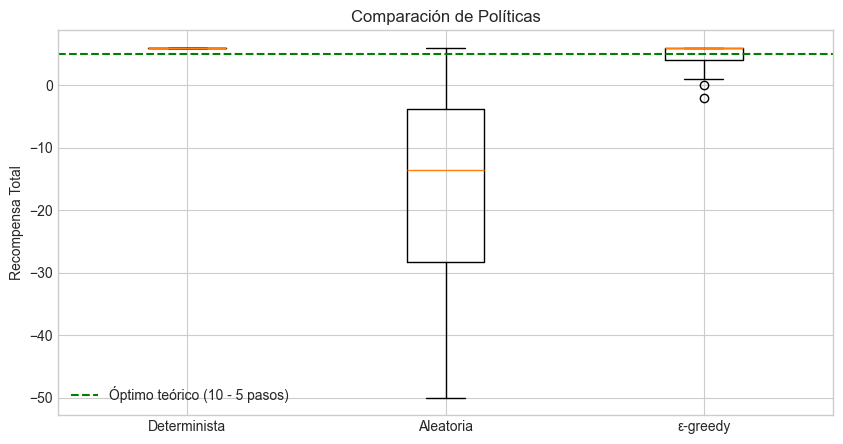

In [4]:
# EJEMPLO PRÁCTICO 2: Tipos de Políticas
# =======================================
# Una política es la "estrategia" del agente: cómo decide qué hacer.
# Comparamos tres tipos de políticas fundamentales.

class PoliticaAleatoria:
    """
    Política que elige acciones completamente al azar.

    Útil como BASELINE: ¿qué tan bien lo hace sin ninguna inteligencia?
    También es útil para exploración pura.
    """
    def __init__(self, n_acciones):
        """
        Args:
            n_acciones: Número de acciones posibles
        """
        self.n_acciones = n_acciones

    def elegir(self, estado):
        """
        Elige una acción ignorando el estado.

        Args:
            estado: Estado actual (no se usa, pero mantiene la interfaz)

        Returns:
            accion: Índice de acción aleatorio
        """
        # random.randint(a, b) incluye ambos extremos
        return random.randint(0, self.n_acciones - 1)


class PoliticaDeterminista:
    """
    Política que siempre elige la misma acción para cada estado.

    Dada una tabla estado→acción, siempre devuelve la misma acción
    para el mismo estado. No hay aleatoriedad.

    Ejemplo: "En el estado A, siempre ir a la derecha"
    """
    def __init__(self, tabla_acciones):
        """
        Args:
            tabla_acciones: Diccionario {estado: accion}
        """
        # La tabla mapea cada estado a su acción óptima
        self.tabla = tabla_acciones

    def elegir(self, estado):
        """
        Busca en la tabla qué acción corresponde a este estado.

        Args:
            estado: Estado actual

        Returns:
            accion: Acción determinada por la tabla
        """
        # Si el estado no está en la tabla, devuelve 0 por defecto
        return self.tabla.get(estado, 0)


class PoliticaEpsilonGreedy:
    """
    Política que balancea EXPLORACIÓN vs EXPLOTACIÓN.

    - Con probabilidad ε (epsilon): elige al AZAR (explorar)
    - Con probabilidad 1-ε: elige la MEJOR acción conocida (explotar)

    ε = 0.0: Siempre explota (puede quedarse en óptimos locales)
    ε = 1.0: Siempre explora (nunca usa lo aprendido)
    ε = 0.1: 10% exploración, 90% explotación (típico en práctica)
    """
    def __init__(self, Q, epsilon=0.1):
        """
        Args:
            Q: Tabla Q (diccionario estado → array de Q-valores)
            epsilon: Probabilidad de explorar (0.0 a 1.0)
        """
        self.Q = Q            # Referencia a la tabla de valores
        self.epsilon = epsilon

    def elegir(self, estado):
        """
        Elige acción usando estrategia ε-greedy.

        Args:
            estado: Estado actual

        Returns:
            accion: Acción seleccionada
        """
        # Generar número aleatorio entre 0 y 1
        if random.random() < self.epsilon:
            # EXPLORAR: Acción aleatoria
            # Esto permite descubrir nuevas estrategias
            n_acciones = len(self.Q[estado])
            return random.randint(0, n_acciones - 1)
        else:
            # EXPLOTAR: Mejor acción según Q
            # np.argmax devuelve el índice del valor máximo
            return np.argmax(self.Q[estado])


# === DEMOSTRACIÓN DE POLÍTICAS ===
print("=" * 50)
print("COMPARACIÓN DE POLÍTICAS")
print("=" * 50)

# Crear tabla Q de ejemplo (valores inventados para demostración)
# Estado (0,0) tiene 4 acciones con diferentes Q-valores
Q_ejemplo = {
    (0, 0): np.array([1.0, 5.0, 2.0, 1.5]),  # La acción 1 (→) es la mejor
    (0, 1): np.array([2.0, 3.0, 4.0, 1.0]),  # La acción 2 (↓) es la mejor
    (1, 0): np.array([0.5, 0.5, 0.5, 0.5]),  # Todas iguales
}

estado = (0, 0)
print(f"\nEstado: {estado}")
print(f"Q-valores: {Q_ejemplo[estado]}")
print(f"Acciones: [↑=0, →=1, ↓=2, ←=3]")
print(f"Mejor acción: → (índice 1, Q=5.0)")

# Probar política aleatoria
print("\n--- Política Aleatoria ---")
pol_aleatoria = PoliticaAleatoria(n_acciones=4)
acciones = [pol_aleatoria.elegir(estado) for _ in range(10)]
print(f"10 elecciones: {acciones}")
print("(Cada acción tiene ~25% de probabilidad)")

# Probar política epsilon-greedy con diferentes epsilon
print("\n--- Política ε-Greedy ---")
for eps in [0.0, 0.1, 0.5, 1.0]:
    pol_eg = PoliticaEpsilonGreedy(Q_ejemplo, epsilon=eps)
    acciones = [pol_eg.elegir(estado) for _ in range(20)]
    cuenta_optima = acciones.count(1)  # Acción 1 es la óptima
    print(f"ε={eps}: {acciones[:10]}... (óptima {cuenta_optima}/20 veces)")

print("\n💡 Observa cómo ε=0 siempre elige 1, mientras ε=1 es aleatorio")

## El Dilema Exploración vs Explotación

Este es uno de los **desafíos fundamentales** del RL y aparece en muchos problemas de la vida real.

### El Problema

- **Exploración**: Probar acciones nuevas/desconocidas para descubrir mejores estrategias
- **Explotación**: Usar el conocimiento actual para maximizar recompensa inmediata

**El dilema**: Si solo explotas, nunca descubrirás opciones mejores. Si solo exploras, nunca aprovecharás lo que ya sabes.

### Analogía: Elegir Restaurante

Imagina que estás de vacaciones 7 días en una ciudad nueva:

| Estrategia | Descripción | Resultado |
|------------|-------------|-----------|
| **Solo explotar** | Día 1 encuentras un restaurante "bueno" y vas los 7 días | Nunca descubres el restaurante increíble de la calle de al lado |
| **Solo explorar** | Cada día pruebas un restaurante diferente | El día 7 descubres el mejor, pero solo comes ahí 1 vez |
| **Balance** | Primeros días exploras, últimos días explotas el mejor | Maximizas la experiencia gastronómica total |

### Estrategia ε-greedy (Epsilon-Greedy)

La solución más simple y utilizada:

```
Con probabilidad ε → Acción ALEATORIA (explorar)
Con probabilidad 1-ε → MEJOR acción conocida (explotar)
```

**Ejemplo con ε = 0.1**:
- 10% de las veces: Prueba algo nuevo
- 90% de las veces: Hace lo que cree que es mejor

### Estrategias de Exploración

| Estrategia | Cómo funciona | Ventajas | Desventajas |
|------------|---------------|----------|-------------|
| **ε-greedy** | Aleatoria con prob ε | Simple de implementar | Exploración no inteligente |
| **ε-decay** | ε disminuye con el tiempo | Más explotación al final | Requiere ajustar el decay |
| **UCB** | Bonus por incertidumbre | Explora lo menos conocido | Más complejo |
| **Boltzmann** | Softmax sobre Q-valores | Favorece acciones prometedoras | Requiere ajustar temperatura |

### ¿Cómo elegir ε?

| Valor ε | Comportamiento | Cuándo usarlo |
|---------|----------------|---------------|
| 0.0 | 100% explotación | Solo evaluación (nunca entrenamiento) |
| 0.01 | Casi solo explotación | Fase final del entrenamiento |
| 0.1 | Balance estándar | La mayoría de problemas |
| 0.3 | Mucha exploración | Inicio del entrenamiento, entornos complejos |
| 1.0 | 100% aleatorio | Solo para comparar con línea base |

**Práctica común**: Empezar con ε alto (0.5-1.0) y reducirlo gradualmente hasta ε pequeño (0.01-0.1).

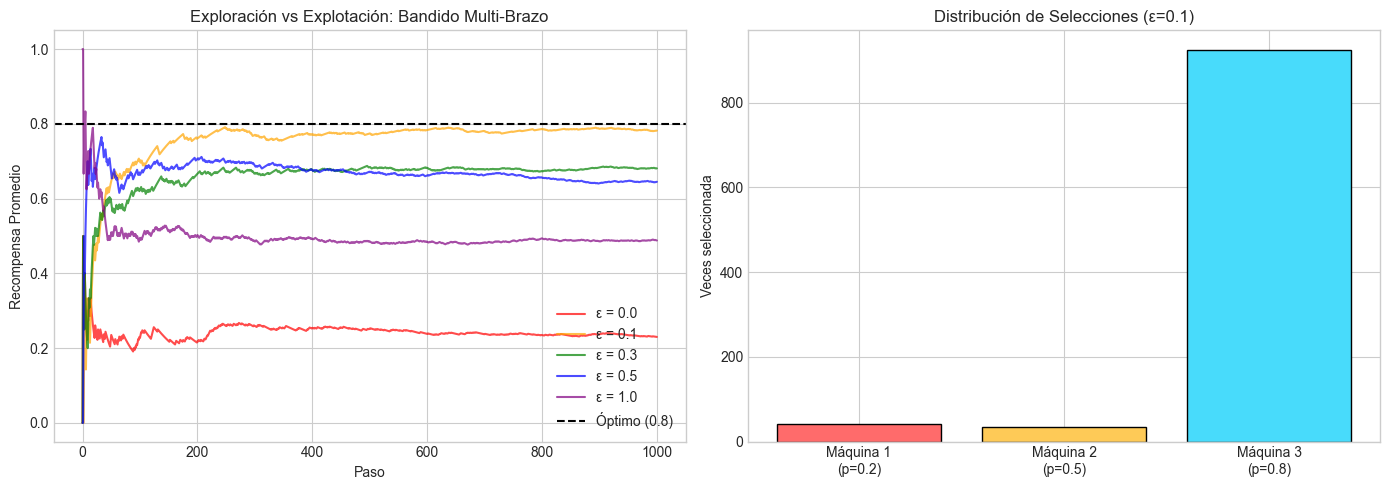


📊 Observaciones:
- ε=0 (greedy puro): Se queda con la primera máquina que parece buena
- ε=0.1: Buen balance, encuentra la óptima y la explota
- ε=1 (aleatorio puro): Nunca explota, recompensa promedio = 0.5


In [5]:
# EJEMPLO PRÁCTICO 3: Visualizando Exploración vs Explotación

def simular_epsilon_greedy(epsilon, n_pasos=1000):
    """Simula el problema del bandido multi-brazo"""
    # 3 máquinas tragamonedas con diferentes probabilidades de premio
    probabilidades_reales = [0.2, 0.5, 0.8]  # La máquina 3 es la mejor
    
    # Estimaciones del agente (inicialmente no sabe nada)
    estimaciones = [0.0, 0.0, 0.0]
    conteos = [0, 0, 0]
    
    recompensa_acumulada = 0
    historial = []
    selecciones = []
    
    for paso in range(n_pasos):
        # Seleccionar acción con ε-greedy
        if random.random() < epsilon:
            accion = random.randint(0, 2)  # Explorar
        else:
            accion = np.argmax(estimaciones)  # Explotar
        
        selecciones.append(accion)
        
        # Obtener recompensa (1 con probabilidad p, 0 sino)
        recompensa = 1 if random.random() < probabilidades_reales[accion] else 0
        recompensa_acumulada += recompensa
        
        # Actualizar estimaciones (promedio incremental)
        conteos[accion] += 1
        estimaciones[accion] += (recompensa - estimaciones[accion]) / conteos[accion]
        
        historial.append(recompensa_acumulada / (paso + 1))
    
    return historial, selecciones


# Comparar diferentes valores de epsilon
epsilons = [0.0, 0.1, 0.3, 0.5, 1.0]
colores = ['red', 'orange', 'green', 'blue', 'purple']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Recompensa promedio a lo largo del tiempo
for eps, color in zip(epsilons, colores):
    historial, _ = simular_epsilon_greedy(eps)
    axes[0].plot(historial, label=f'ε = {eps}', color=color, alpha=0.7)

axes[0].axhline(y=0.8, color='black', linestyle='--', label='Óptimo (0.8)')
axes[0].set_xlabel('Paso')
axes[0].set_ylabel('Recompensa Promedio')
axes[0].set_title('Exploración vs Explotación: Bandido Multi-Brazo')
axes[0].legend()

# Gráfico 2: Distribución de acciones para ε=0.1
_, selecciones = simular_epsilon_greedy(0.1, 1000)
conteo_acciones = [selecciones.count(0), selecciones.count(1), selecciones.count(2)]
colores_barras = ['#ff6b6b', '#feca57', '#48dbfb']
axes[1].bar([0, 1, 2], conteo_acciones, color=colores_barras, edgecolor='black')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Máquina 1\n(p=0.2)', 'Máquina 2\n(p=0.5)', 'Máquina 3\n(p=0.8)'])
axes[1].set_ylabel('Veces seleccionada')
axes[1].set_title('Distribución de Selecciones (ε=0.1)')

plt.tight_layout()
plt.show()

print("\n📊 Observaciones:")
print("- ε=0 (greedy puro): Se queda con la primera máquina que parece buena")
print("- ε=0.1: Buen balance, encuentra la óptima y la explota")
print("- ε=1 (aleatorio puro): Nunca explota, recompensa promedio = 0.5")

---
<a id='3-framework'></a>
# 3. El Framework Agente-Entorno

## Conceptos de Tiempo en RL

### Paso (Step / Timestep)
Una **única interacción** entre el agente y el entorno:

```
Paso t:  Estado(sₜ) → Acción(aₜ) → Recompensa(rₜ₊₁) + Nuevo Estado(sₜ₊₁)
```

**Ejemplo**: En un juego de laberinto, un paso es moverse una casilla.

### Episodio (Episode)
Una **secuencia completa** de pasos desde un estado inicial hasta un estado terminal.

| Tipo de Tarea | ¿Tiene episodios? | Ejemplo |
|---------------|-------------------|---------|
| **Episódica** | Sí, termina | Juego de ajedrez, laberinto |
| **Continua** | No, infinita | Control de temperatura, trading |

**Ejemplos de episodios:**
- Un juego completo de ajedrez (inicio → jaque mate o tablas)
- Un intento de resolver un laberinto (entrada → salida o tiempo agotado)
- Una partida de CartPole (inicio → el poste cae o 500 pasos)

### Trayectoria (Trajectory / Rollout)
La **secuencia ordenada** de todos los estados, acciones y recompensas de un episodio:

$$\tau = (s_0, a_0, r_1, s_1, a_1, r_2, s_2, a_2, r_3, ..., s_T)$$

**¿Por qué es importante la trayectoria?**
- Contiene toda la **experiencia** del episodio
- Se usa para **calcular retornos** y **actualizar políticas**
- Permite analizar **qué pasó** y **por qué**

---

## Episodios, Pasos y Epochs: Terminología Clara

| Término | Definición | Analogía |
|---------|------------|----------|
| **Paso** | Una acción + transición | Un movimiento en ajedrez |
| **Episodio** | Secuencia completa de pasos | Una partida completa |
| **Epoch** | Pasar por todos los datos (en SL) | No aplica directamente en RL |
| **Timestep total** | Suma de todos los pasos de todos los episodios | Experiencia total del agente |

In [6]:
# EJEMPLO PRÁCTICO 4: Entorno de Cuadrícula (GridWorld)
# =====================================================
# GridWorld es el entorno clásico para aprender RL.
# Simple pero contiene todos los elementos fundamentales.

class GridWorld:
    """
    Un mundo de cuadrícula simple donde el agente debe llegar a la meta.

    Mapa 4x4:
    +---+---+---+---+
    | S | · | · | · |    S = Start (inicio, posición 0,0)
    +---+---+---+---+
    | · | X | · | · |    X = Obstáculo (pared, no se puede atravesar)
    +---+---+---+---+
    | · | · | · | · |    · = Celda vacía (se puede caminar)
    +---+---+---+---+
    | · | · | · | G |    G = Goal (meta, posición 3,3)
    +---+---+---+---+

    Recompensas:
    - Llegar a G: +10 (y termina el episodio)
    - Cada paso: -1 (incentiva encontrar el camino más corto)
    """

    def __init__(self):
        """Inicializa el entorno con sus parámetros fijos."""
        # Tamaño de la cuadrícula (4x4 = 16 estados posibles)
        self.grid_size = 4

        # Posiciones especiales (fila, columna)
        self.start = (0, 0)      # Esquina superior izquierda
        self.goal = (3, 3)       # Esquina inferior derecha
        self.obstacle = (1, 1)   # Un obstáculo en el camino

        # Estado actual del agente (empieza en start)
        self.state = self.start

        # DEFINICIÓN DE ACCIONES
        # Cada acción es un desplazamiento (delta_fila, delta_columna)
        self.actions = {
            0: (-1, 0),  # Arriba: fila -1, columna igual
            1: (0, 1),   # Derecha: fila igual, columna +1
            2: (1, 0),   # Abajo: fila +1, columna igual
            3: (0, -1)   # Izquierda: fila igual, columna -1
        }

        # Nombres para visualización
        self.action_names = ['↑', '→', '↓', '←']

    def reset(self):
        """
        Reinicia el entorno al estado inicial.

        Se llama al inicio de cada episodio.

        Returns:
            state: El estado inicial (posición de inicio)
        """
        self.state = self.start  # Volver a la posición inicial
        return self.state        # El agente necesita saber dónde está

    def step(self, action):
        """
        Ejecuta una acción y devuelve el resultado.

        Esta es la función principal del entorno. Implementa la
        dinámica del mundo: cómo responde a las acciones del agente.

        Args:
            action: Índice de la acción (0=↑, 1=→, 2=↓, 3=←)

        Returns:
            new_state: Nueva posición tras la acción
            reward: Recompensa recibida
            done: True si el episodio terminó (llegó a meta)
        """
        # PASO 1: Calcular la nueva posición tentativa
        delta = self.actions[action]  # Obtener desplazamiento
        new_row = self.state[0] + delta[0]  # Nueva fila
        new_col = self.state[1] + delta[1]  # Nueva columna
        new_state = (new_row, new_col)

        # PASO 2: Verificar si el movimiento es válido
        # Un movimiento es válido si:
        # - No sale de los límites de la cuadrícula
        # - No choca contra el obstáculo
        dentro_limites = (0 <= new_row < self.grid_size and
                         0 <= new_col < self.grid_size)
        no_es_obstaculo = (new_state != self.obstacle)

        if dentro_limites and no_es_obstaculo:
            # Movimiento válido: actualizar posición
            self.state = new_state
        # Si no es válido, el agente se queda donde estaba

        # PASO 3: Calcular recompensa según el estado resultante
        if self.state == self.goal:
            reward = 10    # ¡Llegó a la meta! Recompensa alta
            done = True    # El episodio termina
        else:
            reward = -1    # Penalización por paso (incentiva rapidez)
            done = False   # El episodio continúa

        return self.state, reward, done

    def render(self):
        """
        Visualiza el estado actual del entorno en la consola.

        Útil para debugging y para ver qué está haciendo el agente.
        """
        # Crear grid vacío
        grid = [['·' for _ in range(self.grid_size)]
                for _ in range(self.grid_size)]

        # Marcar posiciones especiales
        grid[self.obstacle[0]][self.obstacle[1]] = 'X'  # Obstáculo
        grid[self.goal[0]][self.goal[1]] = 'G'          # Meta
        grid[self.state[0]][self.state[1]] = 'A'        # Agente

        # Imprimir
        print("\n" + "-" * (self.grid_size * 2 + 1))
        for row in grid:
            print("|" + " ".join(row) + "|")
        print("-" * (self.grid_size * 2 + 1))


# === DEMOSTRACIÓN DEL ENTORNO ===
print("=" * 50)
print("DEMOSTRACIÓN DE GRIDWORLD")
print("=" * 50)

# Crear instancia del entorno
env = GridWorld()

# Resetear y mostrar estado inicial
estado = env.reset()
print(f"\nEstado inicial: {estado}")
env.render()

# Ejecutar algunas acciones de ejemplo
print("\nEjecutando secuencia de acciones: → → ↓ ↓ →")
acciones = [1, 1, 2, 2, 1]  # derecha, derecha, abajo, abajo, derecha

for i, accion in enumerate(acciones):
    nuevo_estado, recompensa, terminado = env.step(accion)
    print(f"\nAcción {env.action_names[accion]}: Estado {nuevo_estado}, R={recompensa}")
    env.render()
    if terminado:
        print("\n¡Meta alcanzada!")
        break

GRIDWORLD: Navegación con Obstáculos

Leyenda: A=Agente, G=Meta, X=Obstáculo

Estado inicial: (0, 0)

---------
|A · · ·|
|· X · ·|
|· · · ·|
|· · · G|
---------

Ejecutando trayectoria...

Paso 1: ↓
Transición: (0, 0) → (1, 0)
Recompensa: -1

---------
|· · · ·|
|A X · ·|
|· · · ·|
|· · · G|
---------

Paso 2: ↓
Transición: (1, 0) → (2, 0)
Recompensa: -1

---------
|· · · ·|
|· X · ·|
|A · · ·|
|· · · G|
---------

Paso 3: →
Transición: (2, 0) → (2, 1)
Recompensa: -1

---------
|· · · ·|
|· X · ·|
|· A · ·|
|· · · G|
---------

Paso 4: →
Transición: (2, 1) → (2, 2)
Recompensa: -1

---------
|· · · ·|
|· X · ·|
|· · A ·|
|· · · G|
---------

Paso 5: ↓
Transición: (2, 2) → (3, 2)
Recompensa: -1

---------
|· · · ·|
|· X · ·|
|· · · ·|
|· · A G|
---------

Paso 6: →
Transición: (3, 2) → (3, 3)
Recompensa: 10

---------
|· · · ·|
|· X · ·|
|· · · ·|
|· · · A|
---------

🎉 ¡Meta alcanzada!

TRAYECTORIA COMPLETA
(estado, acción, recompensa, siguiente_estado)
  ((0, 0), 2, -1, (1, 0))
  ((1,

---
<a id='4-mdp'></a>
# 4. Proceso de Decisión de Markov (MDP)

El MDP es el **marco matemático formal** que describe los problemas de RL. Entenderlo es clave para comprender los algoritmos.

## Definición Formal

Un **MDP** es una tupla $(S, A, P, R, \gamma)$ donde:

| Componente | Símbolo | Descripción | Ejemplo (Robot en laberinto) |
|------------|---------|-------------|------------------------------|
| **Estados** | S | Conjunto de todos los estados posibles | Todas las celdas del laberinto |
| **Acciones** | A | Conjunto de acciones disponibles | {↑, ↓, ←, →} |
| **Transiciones** | P(s'\|s, a) | Probabilidad de llegar a s' desde s con acción a | P(norte \| celda_5, ↑) = 0.8 |
| **Recompensas** | R(s, a, s') | Recompensa por la transición | +100 si s' es la meta, -1 por paso |
| **Descuento** | γ (gamma) | Factor de descuento para recompensas futuras | 0.99 |

## Propiedad de Markov: "El presente contiene todo"

> "El futuro es independiente del pasado **dado el presente**"

$$P(s_{t+1} | s_t, a_t, s_{t-1}, a_{t-1}, ..., s_0, a_0) = P(s_{t+1} | s_t, a_t)$$

### ¿Qué significa esto en la práctica?

**Si tienes el estado actual, no necesitas saber cómo llegaste ahí.**

**Ejemplo del ajedrez:**
- El estado actual (posición de todas las piezas) contiene toda la información necesaria
- No importa si llegaste a esa posición en 10 o 50 movimientos
- La mejor jugada solo depende de la posición actual

**Ejemplo donde NO se cumple (sin modificar):**
- Blackjack con baraja que no se baraja: las cartas ya jugadas importan
- Solución: Incluir las cartas jugadas en el estado

**Regla general**: Si la propiedad de Markov no se cumple, **expande el estado** para incluir la información histórica relevante.

---

## Factor de Descuento (γ): "Un euro hoy vale más que un euro mañana"

El **factor de descuento** es crucial y responde a la pregunta: ¿Cuánto valen las recompensas futuras comparadas con las inmediatas?

### La Fórmula del Retorno

El **retorno** G es la suma de recompensas futuras descontadas:

$$G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + ... = \sum_{k=0}^{\infty} \gamma^k r_{t+k+1}$$

### Interpretación Intuitiva

| γ | Nombre | Comportamiento | Analogía |
|---|--------|----------------|----------|
| 0 | Miope | Solo ve la recompensa inmediata | "Quiero el caramelo AHORA" |
| 0.5 | Cortoplacista | Futuro lejano casi no importa | Estudiante que estudia la noche antes |
| 0.9 | Balanceado | Considera futuro cercano | Planificación mensual |
| 0.99 | Largo plazo | Todo el futuro importa mucho | Planificación de jubilación |
| 1.0 | Sin descuento | Todas las recompensas valen igual | Solo válido si el episodio termina |

### ¿Por qué necesitamos γ < 1?

1. **Matemáticas**: Con γ = 1 y episodios infinitos, la suma diverge (∞)
2. **Incertidumbre**: El futuro lejano es menos predecible
3. **Sesgo práctico**: Queremos que el agente actúe, no que espere eternamente
4. **Convergencia**: Los algoritmos convergen más rápido con γ < 1

### Ejemplo Numérico

Si recibimos las recompensas `[1, 1, 1, 1, 10]` con diferentes γ:

| γ | Cálculo | Retorno G |
|---|---------|-----------|
| 0.0 | 1 | 1.00 |
| 0.5 | 1 + 0.5(1) + 0.25(1) + 0.125(1) + 0.0625(10) | 2.50 |
| 0.9 | 1 + 0.9(1) + 0.81(1) + 0.729(1) + 0.6561(10) | 10.00 |
| 1.0 | 1 + 1 + 1 + 1 + 10 | 14.00 |

**Observación**: Con γ bajo, la recompensa final de 10 apenas cuenta. Con γ alto, domina el retorno.

IMPACTO DEL FACTOR DE DESCUENTO (γ)

Recompensas del episodio: [-1, -1, -1, -1, 10]
(4 pasos con -1, luego +10 al llegar a la meta)

γ = 0.00 → Retorno G = -1.00
γ = 0.50 → Retorno G = -1.25
γ = 0.90 → Retorno G = 3.12
γ = 0.99 → Retorno G = 5.67
γ = 1.00 → Retorno G = 6.00


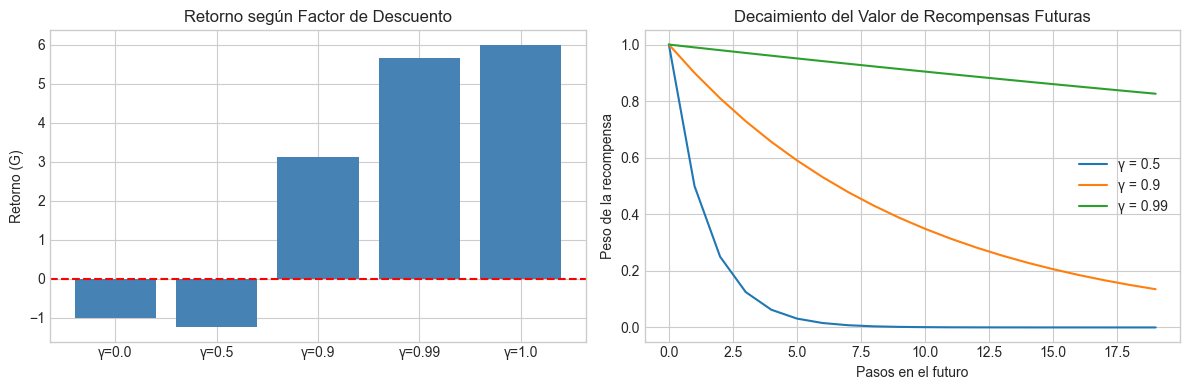


📊 Interpretación:
- γ=0: Solo ve la primera recompensa (-1). Muy miope.
- γ=0.9: Balance entre presente y futuro.
- γ=1: Todo el episodio vale igual (-1-1-1-1+10 = 6).


In [7]:
# EJEMPLO PRÁCTICO 5: Impacto del Factor de Descuento

def calcular_retorno(recompensas, gamma):
    """Calcula el retorno descontado G_t"""
    G = 0
    for i, r in enumerate(recompensas):
        G += (gamma ** i) * r
    return G

# Ejemplo: Recompensas de un episodio
recompensas = [-1, -1, -1, -1, 10]  # 4 pasos de penalización, luego recompensa

print("=" * 50)
print("IMPACTO DEL FACTOR DE DESCUENTO (γ)")
print("=" * 50)
print(f"\nRecompensas del episodio: {recompensas}")
print("(4 pasos con -1, luego +10 al llegar a la meta)\n")

gammas = [0.0, 0.5, 0.9, 0.99, 1.0]
retornos = []

for gamma in gammas:
    G = calcular_retorno(recompensas, gamma)
    retornos.append(G)
    print(f"γ = {gamma:.2f} → Retorno G = {G:.2f}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico 1: Retorno vs Gamma
axes[0].bar(range(len(gammas)), retornos, color='steelblue')
axes[0].set_xticks(range(len(gammas)))
axes[0].set_xticklabels([f'γ={g}' for g in gammas])
axes[0].set_ylabel('Retorno (G)')
axes[0].set_title('Retorno según Factor de Descuento')
axes[0].axhline(y=0, color='red', linestyle='--')

# Gráfico 2: Decaimiento del valor de recompensas futuras
pasos = np.arange(0, 20)
for gamma in [0.5, 0.9, 0.99]:
    valores = gamma ** pasos
    axes[1].plot(pasos, valores, label=f'γ = {gamma}')

axes[1].set_xlabel('Pasos en el futuro')
axes[1].set_ylabel('Peso de la recompensa')
axes[1].set_title('Decaimiento del Valor de Recompensas Futuras')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n📊 Interpretación:")
print("- γ=0: Solo ve la primera recompensa (-1). Muy miope.")
print("- γ=0.9: Balance entre presente y futuro.")
print("- γ=1: Todo el episodio vale igual (-1-1-1-1+10 = 6).")

---
<a id='5-politicas'></a>
# 5. Políticas y Funciones de Valor

Las funciones de valor son el **corazón** de muchos algoritmos de RL. Responden a la pregunta: "¿Qué tan bueno es estar en este estado?" o "¿Qué tan bueno es tomar esta acción?"

## Función de Valor de Estado V(s)

¿Qué tan **bueno** es estar en un estado s siguiendo una política π?

$$V^\pi(s) = \mathbb{E}_\pi \left[ G_t | s_t = s \right] = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k r_{t+k+1} | s_t = s \right]$$

### Interpretación

**V(s)** es el **retorno esperado** (suma de recompensas futuras descontadas) empezando desde el estado s y siguiendo la política π.

**Ejemplo del laberinto:**
- V(celda_meta) = +100 (alta, estás en la meta)
- V(celda_junto_meta) = +99 (alta, estás muy cerca)
- V(celda_inicio) = +30 (media, lejos pero alcanzable)
- V(celda_sin_salida) = -50 (baja, trampa)

### ¿Para qué sirve V(s)?

1. **Evaluar políticas**: Compara qué política es mejor
2. **Guiar la exploración**: Ir hacia estados con alto V
3. **Detectar problemas**: Estados con V muy bajo pueden ser trampas

---

## Función de Valor de Acción Q(s, a)

¿Qué tan bueno es tomar la acción **a** en el estado **s** y luego seguir la política π?

$$Q^\pi(s, a) = \mathbb{E}_\pi \left[ G_t | s_t = s, a_t = a \right]$$

### Interpretación

**Q(s, a)** es el retorno esperado si:
1. Estás en estado s
2. Tomas la acción a
3. Después sigues la política π

**Ejemplo del laberinto en celda_5:**
- Q(celda_5, ↑) = +95 (ir arriba te acerca a la meta)
- Q(celda_5, →) = +80 (ir derecha es bueno, pero hay desvío)
- Q(celda_5, ↓) = +20 (ir abajo te aleja)
- Q(celda_5, ←) = -10 (ir izquierda lleva a trampa)

### ¿Por qué Q es más útil que V en la práctica?

**Con Q(s,a) puedes elegir acciones directamente:**
```python
mejor_accion = argmax(Q[estado])  # La acción con mayor Q
```

**Con V(s) necesitas conocer las transiciones:**
```python
# Necesitas saber a qué estado lleva cada acción
mejor_accion = argmax([V[siguiente(estado, a)] for a in acciones])
```

---

## Relación entre V y Q

$$V^\pi(s) = \sum_a \pi(a|s) \cdot Q^\pi(s, a)$$

El valor de un estado es el **promedio ponderado** de los Q-valores de las acciones, ponderado por la probabilidad de elegir cada acción según la política.

### Ejemplo

Si en estado s la política es: 70% acción A, 30% acción B

- Q(s, A) = 10
- Q(s, B) = 5

Entonces:
$$V(s) = 0.7 \times 10 + 0.3 \times 5 = 7 + 1.5 = 8.5$$

---

## Políticas y Valores Óptimos

### Política Óptima (π*)
La política que **maximiza** el retorno esperado desde cualquier estado.

### Función de Valor Óptima (V* y Q*)
Los valores bajo la política óptima:

$$V^*(s) = \max_\pi V^\pi(s)$$
$$Q^*(s, a) = \max_\pi Q^\pi(s, a)$$

### Propiedad Fundamental

Si conoces Q*, obtener la política óptima es trivial:

$$\pi^*(s) = \arg\max_a Q^*(s, a)$$

**Traducción**: En cada estado, simplemente elige la acción con mayor Q-valor.

**Esto es exactamente lo que hace Q-Learning: aprender Q* directamente.**

ESTIMACIÓN DE V(s) - Monte Carlo
Política: Aleatoria | γ = 0.9 | 5000 episodios



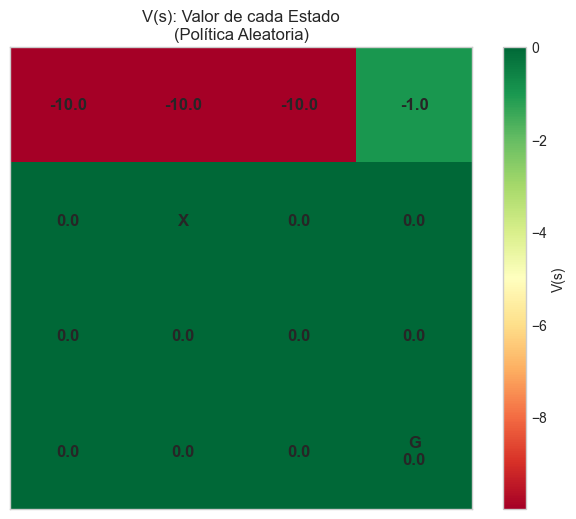


📊 Interpretación:
- Los estados cercanos a la meta tienen valores más altos (verdes)
- Estados lejanos tienen valores más bajos (rojos)
- El valor indica el retorno esperado siguiendo la política aleatoria


In [8]:
# EJEMPLO PRÁCTICO 6: Calculando V(s) por Monte Carlo

def estimar_valores_mc(env, politica, n_episodios=1000, gamma=0.9):
    """
    Estima V(s) usando Monte Carlo.
    Ejecuta muchos episodios y promedia los retornos observados.
    """
    # Diccionarios para acumular retornos
    retornos_totales = defaultdict(float)
    visitas = defaultdict(int)
    
    for _ in range(n_episodios):
        # Generar un episodio
        episodio = []
        estado = env.reset()
        
        for _ in range(100):  # Máximo 100 pasos
            accion = politica.seleccionar_accion(estado)
            nuevo_estado, recompensa, terminado = env.step(accion)
            episodio.append((estado, accion, recompensa))
            estado = nuevo_estado
            if terminado:
                break
        
        # Calcular retornos para cada estado visitado (first-visit MC)
        G = 0
        estados_visitados = set()
        
        for t in reversed(range(len(episodio))):
            estado_t, _, recompensa_t = episodio[t]
            G = gamma * G + recompensa_t
            
            if estado_t not in estados_visitados:
                estados_visitados.add(estado_t)
                retornos_totales[estado_t] += G
                visitas[estado_t] += 1
    
    # Calcular V(s) = promedio de retornos
    V = {s: retornos_totales[s] / visitas[s] for s in retornos_totales}
    return V


# Estimar valores para GridWorld con política aleatoria
env = GridWorld()
politica_aleatoria = PoliticaAleatoria()

print("=" * 50)
print("ESTIMACIÓN DE V(s) - Monte Carlo")
print("=" * 50)
print("Política: Aleatoria | γ = 0.9 | 5000 episodios\n")

V = estimar_valores_mc(env, politica_aleatoria, n_episodios=5000, gamma=0.9)

# Crear matriz de valores
V_matrix = np.zeros((4, 4))
for (i, j), valor in V.items():
    V_matrix[i, j] = valor

# Visualizar
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(V_matrix, cmap='RdYlGn')

# Añadir valores en cada celda
for i in range(4):
    for j in range(4):
        if (i, j) == (1, 1):  # Obstáculo
            text = 'X'
        elif (i, j) == (3, 3):  # Meta
            text = f'G\n{V_matrix[i, j]:.1f}'
        else:
            text = f'{V_matrix[i, j]:.1f}'
        ax.text(j, i, text, ha='center', va='center', fontsize=12, fontweight='bold')

ax.set_title('V(s): Valor de cada Estado\n(Política Aleatoria)')
ax.set_xticks([])
ax.set_yticks([])
plt.colorbar(im, label='V(s)')
plt.show()

print("\n📊 Interpretación:")
print("- Los estados cercanos a la meta tienen valores más altos (verdes)")
print("- Estados lejanos tienen valores más bajos (rojos)")
print("- El valor indica el retorno esperado siguiendo la política aleatoria")

---
<a id='6-qlearning'></a>
# 6. Q-Learning: Tu Primer Algoritmo de RL

Q-Learning es probablemente el algoritmo de RL más importante y fundamental. Es elegante, simple, y sorprendentemente poderoso.

## ¿Por qué Q-Learning?

| Característica | Descripción |
|----------------|-------------|
| **Model-free** | No necesita conocer cómo funciona el entorno (P, R) |
| **Off-policy** | Aprende la política óptima mientras sigue otra política |
| **Convergencia** | Garantizado a converger a Q* (bajo ciertas condiciones) |
| **Simplicidad** | Una sola ecuación de actualización |

## La Ecuación de Bellman para Q*

La función Q óptima satisface esta ecuación:

$$Q^*(s, a) = \mathbb{E}\left[ r + \gamma \max_{a'} Q^*(s', a') \right]$$

**Interpretación**: El valor óptimo de (s, a) es la recompensa inmediata más el mejor valor futuro posible.

## La Regla de Actualización de Q-Learning

$$Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]$$

### Desglose paso a paso:

| Término | Nombre | Significado |
|---------|--------|-------------|
| `Q(s, a)` | Q-valor actual | Lo que creemos que vale (s, a) |
| `α (alpha)` | Learning rate | ¿Cuánto confiar en la nueva info? (0.01-0.5) |
| `r` | Recompensa | Lo que obtuvimos realmente |
| `γ (gamma)` | Descuento | Importancia del futuro (0.9-0.99) |
| `max Q(s', a')` | Mejor futuro | El mejor Q-valor del siguiente estado |
| `r + γ max Q(s', a')` | **TD Target** | El valor "real" estimado |
| `TD Target - Q(s,a)` | **TD Error** | Cuánto nos equivocamos |

### Analogía: Aprender a estimar tiempos

Imagina que estimas cuánto tardas en llegar al trabajo:
- Tu estimación actual: 30 minutos
- Hoy tardaste: 25 minutos (r = 25)
- Learning rate α = 0.2

Nueva estimación:
$$Q_{nuevo} = 30 + 0.2 \times (25 - 30) = 30 + 0.2 \times (-5) = 29$$

¡Tu estimación se ajustó hacia la realidad!

---

## Algoritmo Completo

```
1. Inicializar Q(s, a) = 0 para todo (s, a)  [o valores pequeños aleatorios]

2. Para cada episodio:
    a. s = estado_inicial

    b. Mientras no termine el episodio:
        i.   Elegir acción a usando ε-greedy sobre Q(s)
        ii.  Ejecutar a, observar recompensa r y nuevo estado s'
        iii. Actualizar: Q(s,a) ← Q(s,a) + α[r + γ max Q(s',a') - Q(s,a)]
        iv.  s ← s'

3. Repetir hasta convergencia
```

---

## Hiperparámetros Clave

| Parámetro | Símbolo | Rango típico | Efecto si es muy alto | Efecto si es muy bajo |
|-----------|---------|--------------|----------------------|----------------------|
| Learning rate | α | 0.01 - 0.5 | Inestable, oscila | Aprende muy lento |
| Descuento | γ | 0.9 - 0.99 | Muy orientado al futuro | Muy miope |
| Exploración | ε | 0.1 - 1.0 | Mucho ruido | Se queda en óptimos locales |

### Consejos prácticos:

1. **α (Learning Rate)**:
   - Empieza con α = 0.1
   - Reduce si el aprendizaje es inestable
   - Puede decrecer con el tiempo (α = α₀ / (1 + t))

2. **γ (Factor de Descuento)**:
   - Usa γ = 0.99 para tareas donde el futuro importa mucho
   - Usa γ = 0.9 para tareas más simples
   - γ = 0 solo si cada paso es independiente

3. **ε (Exploración)**:
   - Empieza con ε = 1.0 (totalmente aleatorio)
   - Reduce gradualmente: `ε = max(0.01, ε * 0.995)`
   - Nunca llegar a ε = 0 durante entrenamiento

ENTRENAMIENTO Q-LEARNING


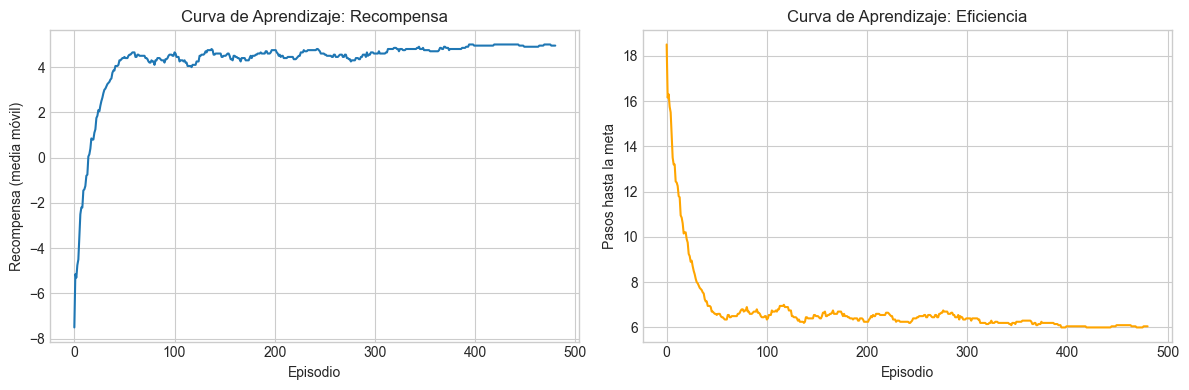


📊 Resultados:
Recompensa promedio (últimos 50 ep): 4.94
Pasos promedio (últimos 50 ep): 6.06


In [9]:
# EJEMPLO PRÁCTICO 7: Q-Learning desde cero
# ============================================
# Implementación completa del algoritmo Q-Learning.
# Este es el algoritmo fundamental de RL tabular.

class QLearningAgent:
    """
    Agente Q-Learning con tabla Q.

    La tabla Q almacena el valor estimado de cada par (estado, acción).
    El agente aprende actualizando estos valores basándose en la experiencia.
    """

    def __init__(self, n_acciones, alpha=0.1, gamma=0.99, epsilon=0.1):
        """
        Inicializa el agente con los hiperparámetros.

        Args:
            n_acciones: Número de acciones posibles (4 para GridWorld: ↑↓←→)
            alpha: Tasa de aprendizaje (0.1 = aprender 10% de cada experiencia)
            gamma: Factor de descuento (0.99 = el futuro importa casi tanto como el presente)
            epsilon: Probabilidad de exploración (0.1 = 10% acciones aleatorias)
        """
        self.n_acciones = n_acciones
        self.alpha = alpha      # α: Cuánto peso dar a nueva información
        self.gamma = gamma      # γ: Cuánto valorar recompensas futuras
        self.epsilon = epsilon  # ε: Balance exploración/explotación

        # TABLA Q: Diccionario que mapea estados a arrays de Q-valores
        # Usamos defaultdict para crear automáticamente entradas nuevas
        # Cada entrada: [Q(s,a0), Q(s,a1), Q(s,a2), Q(s,a3)]
        # Inicializamos en 0 (optimismo neutral)
        self.Q = defaultdict(lambda: np.zeros(n_acciones))

    def seleccionar_accion(self, estado):
        """
        Selecciona una acción usando política ε-greedy.

        ε-greedy: Con probabilidad ε elige al azar (explorar),
        con probabilidad 1-ε elige la mejor acción conocida (explotar).

        Args:
            estado: Estado actual del entorno

        Returns:
            accion: Índice de la acción seleccionada (0-3)
        """
        # Generar número aleatorio entre 0 y 1
        if random.random() < self.epsilon:
            # EXPLORAR: Elegir acción aleatoria
            # Esto permite descubrir nuevas estrategias
            return random.randint(0, self.n_acciones - 1)
        else:
            # EXPLOTAR: Elegir la mejor acción conocida
            # np.argmax devuelve el índice del valor máximo
            return np.argmax(self.Q[estado])

    def aprender(self, estado, accion, recompensa, nuevo_estado, terminado):
        """
        Actualiza la tabla Q usando la regla de Q-Learning.

        La ecuación de Q-Learning:
        Q(s,a) ← Q(s,a) + α[r + γ·max(Q(s',a')) - Q(s,a)]

        Args:
            estado: Estado donde se tomó la acción
            accion: Acción que se ejecutó
            recompensa: Recompensa recibida (r)
            nuevo_estado: Estado resultante (s')
            terminado: Si el episodio terminó

        Returns:
            error_td: Diferencia entre predicción y realidad (útil para debugging)
        """
        # PASO 1: Calcular el TARGET (valor "real" estimado)
        if terminado:
            # Si terminó, no hay futuro: el target es solo la recompensa
            target = recompensa
        else:
            # Target = recompensa + γ × mejor Q-valor futuro
            # np.max(self.Q[nuevo_estado]) = max_a' Q(s', a')
            mejor_q_futuro = np.max(self.Q[nuevo_estado])
            target = recompensa + self.gamma * mejor_q_futuro

        # PASO 2: Calcular el ERROR TD (Temporal Difference)
        # Error = lo que debería valer - lo que creíamos que valía
        q_actual = self.Q[estado][accion]
        error_td = target - q_actual

        # PASO 3: Actualizar Q hacia el target
        # Movemos Q un paso (proporcional a α) hacia el target
        self.Q[estado][accion] += self.alpha * error_td

        return error_td


def entrenar_qlearning(env, n_episodios=500):
    """
    Entrena un agente Q-Learning en el entorno dado.

    El proceso de entrenamiento:
    1. Para cada episodio:
       - Resetear entorno
       - Interactuar hasta terminar
       - Aprender de cada transición
    2. Reducir exploración gradualmente (epsilon decay)

    Args:
        env: Entorno de entrenamiento (debe tener reset() y step())
        n_episodios: Número de episodios de entrenamiento

    Returns:
        agente: Agente entrenado
        recompensas: Lista de recompensas por episodio (para graficar)
        pasos: Lista de pasos por episodio (para graficar)
    """
    # Crear agente con hiperparámetros iniciales
    # epsilon=0.2 significa 20% exploración al inicio
    agente = QLearningAgent(n_acciones=4, alpha=0.1, gamma=0.9, epsilon=0.2)

    # Listas para trackear el progreso
    recompensas_por_episodio = []
    pasos_por_episodio = []

    # BUCLE DE ENTRENAMIENTO
    for episodio in range(n_episodios):
        # Reiniciar el entorno al inicio de cada episodio
        estado = env.reset()
        recompensa_total = 0
        pasos = 0

        # BUCLE DE UN EPISODIO
        # Máximo 100 pasos para evitar bucles infinitos
        for _ in range(100):
            # 1. Elegir acción con política ε-greedy
            accion = agente.seleccionar_accion(estado)

            # 2. Ejecutar acción en el entorno
            nuevo_estado, recompensa, terminado = env.step(accion)

            # 3. APRENDER de esta experiencia
            # Esta es la línea clave: actualizar Q(s,a)
            agente.aprender(estado, accion, recompensa, nuevo_estado, terminado)

            # 4. Acumular métricas
            recompensa_total += recompensa
            pasos += 1

            # 5. Transición al nuevo estado
            estado = nuevo_estado

            # 6. Verificar si terminó el episodio
            if terminado:
                break

        # Guardar métricas del episodio
        recompensas_por_episodio.append(recompensa_total)
        pasos_por_episodio.append(pasos)

        # EPSILON DECAY: Reducir exploración gradualmente
        # Al inicio explora mucho, al final casi solo explota
        # 0.995^500 ≈ 0.08, así que epsilon va de 0.2 a ~0.01
        agente.epsilon = max(0.01, agente.epsilon * 0.995)

    return agente, recompensas_por_episodio, pasos_por_episodio


# === EJECUTAR ENTRENAMIENTO ===
print("=" * 50)
print("ENTRENAMIENTO Q-LEARNING")
print("=" * 50)

# Crear entorno GridWorld (definido anteriormente)
env = GridWorld()

# Entrenar durante 500 episodios
agente, recompensas, pasos = entrenar_qlearning(env, n_episodios=500)

# Mostrar progreso
print(f"\nProgreso del entrenamiento:")
print(f"  Primeros 50 episodios - Recompensa promedio: {np.mean(recompensas[:50]):.2f}")
print(f"  Últimos 50 episodios  - Recompensa promedio: {np.mean(recompensas[-50:]):.2f}")
print(f"\n💡 La mejora muestra que el agente está aprendiendo!")


POLÍTICA APRENDIDA

Política (flechas indican mejor acción):
-----------------
| → | → | ↓ | ↓ |
| ↓ | X | → | ↓ |
| ↓ | ↓ | ↓ | ↓ |
| → | → | → | G |
-----------------


C:\Users\XaviLara\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


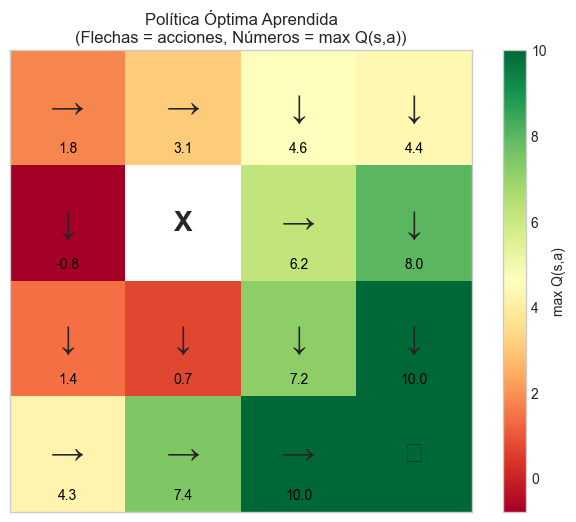


EJECUCIÓN DE LA POLÍTICA APRENDIDA

---------
|A · · ·|
|· X · ·|
|· · · ·|
|· · · G|
---------

Paso 1: →

---------
|· A · ·|
|· X · ·|
|· · · ·|
|· · · G|
---------

Paso 2: →

---------
|· · A ·|
|· X · ·|
|· · · ·|
|· · · G|
---------

Paso 3: ↓

---------
|· · · ·|
|· X A ·|
|· · · ·|
|· · · G|
---------

Paso 4: →

---------
|· · · ·|
|· X · A|
|· · · ·|
|· · · G|
---------

Paso 5: ↓

---------
|· · · ·|
|· X · ·|
|· · · A|
|· · · G|
---------

Paso 6: ↓

---------
|· · · ·|
|· X · ·|
|· · · ·|
|· · · A|
---------

🎉 ¡Meta alcanzada de forma óptima!


In [10]:
# EJEMPLO PRÁCTICO 8: Visualizar la política aprendida

def visualizar_politica(agente, env):
    """Muestra la política aprendida y los Q-valores"""
    flechas = ['↑', '→', '↓', '←']
    
    print("\n" + "=" * 50)
    print("POLÍTICA APRENDIDA")
    print("=" * 50)
    
    # Crear grids
    politica_grid = [[' ' for _ in range(4)] for _ in range(4)]
    valor_grid = np.zeros((4, 4))
    
    for i in range(4):
        for j in range(4):
            estado = (i, j)
            if estado == (1, 1):  # Obstáculo
                politica_grid[i][j] = 'X'
                valor_grid[i, j] = np.nan
            elif estado == (3, 3):  # Meta
                politica_grid[i][j] = 'G'
                valor_grid[i, j] = 10
            else:
                mejor_accion = np.argmax(agente.Q[estado])
                politica_grid[i][j] = flechas[mejor_accion]
                valor_grid[i, j] = np.max(agente.Q[estado])
    
    # Mostrar política como texto
    print("\nPolítica (flechas indican mejor acción):")
    print("-" * 17)
    for row in politica_grid:
        print("| " + " | ".join(row) + " |")
    print("-" * 17)
    
    # Visualizar Q-valores máximos
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Crear mapa de calor
    masked_grid = np.ma.masked_invalid(valor_grid)
    im = ax.imshow(masked_grid, cmap='RdYlGn')
    
    # Añadir flechas y valores
    for i in range(4):
        for j in range(4):
            if politica_grid[i][j] == 'X':
                ax.text(j, i, 'X', ha='center', va='center', fontsize=20, fontweight='bold')
            elif politica_grid[i][j] == 'G':
                ax.text(j, i, '⭐', ha='center', va='center', fontsize=20)
            else:
                ax.text(j, i, politica_grid[i][j], ha='center', va='center', 
                       fontsize=24, fontweight='bold')
                ax.text(j, i + 0.35, f'{valor_grid[i,j]:.1f}', ha='center', 
                       va='center', fontsize=10, color='black')
    
    ax.set_title('Política Óptima Aprendida\n(Flechas = acciones, Números = max Q(s,a))')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(im, label='max Q(s,a)')
    plt.show()


# Visualizar
visualizar_politica(agente, env)

# Ejecutar la política aprendida
print("\n" + "=" * 50)
print("EJECUCIÓN DE LA POLÍTICA APRENDIDA")
print("=" * 50)

env = GridWorld()
estado = env.reset()
env.render()

for paso in range(10):
    accion = np.argmax(agente.Q[estado])  # Greedy (sin exploración)
    nuevo_estado, recompensa, terminado = env.step(accion)
    
    print(f"\nPaso {paso + 1}: {env.action_names[accion]}")
    env.render()
    
    estado = nuevo_estado
    if terminado:
        print("\n🎉 ¡Meta alcanzada de forma óptima!")
        break

---
<a id='7-sarsa'></a>
# 7. SARSA: Aprendizaje On-Policy

Mientras Q-Learning aprende la política óptima independientemente de cómo actúe, **SARSA** aprende el valor de la política que realmente está siguiendo. Esta diferencia fundamental tiene implicaciones importantes en la práctica.

## ¿Qué significa SARSA?

El nombre **SARSA** viene de la secuencia de elementos que usa en cada actualización:

$$\boxed{S_t \rightarrow A_t \rightarrow R_{t+1} \rightarrow S_{t+1} \rightarrow A_{t+1}}$$

| Letra | Significado | Descripción |
|-------|-------------|-------------|
| **S** | State (t) | Estado actual |
| **A** | Action (t) | Acción que tomamos |
| **R** | Reward (t+1) | Recompensa recibida |
| **S** | State (t+1) | Nuevo estado |
| **A** | Action (t+1) | Siguiente acción **que realmente tomaremos** |

## La Ecuación de SARSA

$$Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma Q(s', a') - Q(s, a) \right]$$

**La diferencia clave con Q-Learning**: En lugar de usar `max Q(s', a')`, SARSA usa `Q(s', a')` donde `a'` es la acción que **realmente va a ejecutar** según su política actual (incluyendo exploración).

| Algoritmo | Target | Significado |
|-----------|--------|-------------|
| Q-Learning | `r + γ max Q(s', a')` | "¿Qué pasaría si actuara óptimamente?" |
| SARSA | `r + γ Q(s', a')` | "¿Qué pasará con mi política actual?" |

## Algoritmo SARSA Completo

```
1. Inicializar Q(s, a) arbitrariamente

2. Para cada episodio:
    a. s = estado_inicial
    b. Elegir a desde s usando ε-greedy sobre Q    ← Se elige ANTES del bucle

    c. Mientras no termine el episodio:
        i.   Ejecutar a, observar r y s'
        ii.  Elegir a' desde s' usando ε-greedy sobre Q  ← ¡ANTES de actualizar!
        iii. Actualizar: Q(s,a) ← Q(s,a) + α[r + γ Q(s',a') - Q(s,a)]
        iv.  s ← s', a ← a'

3. Repetir hasta convergencia
```

**Nota importante**: En SARSA, elegimos `a'` antes de actualizar Q, y luego esa `a'` se convierte en la `a` del siguiente paso. Esto garantiza que usamos la acción real que tomaremos.

---

## On-Policy vs Off-Policy: La Diferencia Fundamental

| Aspecto | Q-Learning (Off-policy) | SARSA (On-policy) |
|---------|------------------------|-------------------|
| **Pregunta que responde** | "¿Cuál es el valor si actúo **óptimamente**?" | "¿Cuál es el valor si sigo **mi política actual**?" |
| **Target** | `r + γ max Q(s', a')` | `r + γ Q(s', a')` |
| **Considera exploración** | No (asume que siempre elegirá lo mejor) | Sí (incluye acciones ε-aleatorias) |
| **Política aprendida** | Óptima | La que está ejecutando |
| **Datos de entrenamiento** | Puede usar experiencias antiguas | Debe usar experiencias de la política actual |

### ¿Qué significa "Off-policy"?

- **Off-policy** (Q-Learning): Puede aprender sobre una política (la óptima) mientras sigue otra política diferente (ε-greedy). Es como aprender a cocinar leyendo recetas mientras comes comida rápida.

- **On-policy** (SARSA): Aprende sobre la misma política que está ejecutando. Es como aprender a cocinar practicando realmente en la cocina.

---

## Ejemplo Detallado: El Robot y el Precipicio

Este es el ejemplo clásico que ilustra la diferencia entre ambos algoritmos.

Imagina un robot que debe cruzar una habitación con un precipicio en el borde:

```
+---+---+---+---+---+---+
| S |   |   |   |   | G |   S = Inicio, G = Meta
+---+---+---+---+---+---+
| ☠ | ☠ | ☠ | ☠ | ☠ | ☠ |   ☠ = Precipicio (recompensa: -100)
+---+---+---+---+---+---+

Recompensas:
- Cada paso: -1
- Caer al precipicio: -100 (y volver al inicio)
- Llegar a G: 0 (fin del episodio)
```

**Camino óptimo teórico**: Ir por arriba, pegado al borde (6 pasos = -6).

### ¿Qué aprende cada algoritmo con ε = 0.1?

| Algoritmo | Lo que aprende | Camino resultante |
|-----------|----------------|-------------------|
| **Q-Learning** | "El camino óptimo es por el borde" | Aprende Q-valores altos para el borde, pero durante entrenamiento cae frecuentemente |
| **SARSA** | "Cerca del borde es peligroso porque a veces exploro" | Aprende a alejarse del borde, camino más largo pero más seguro |

### ¿Por qué ocurre esto?

**Q-Learning** calcula: `max Q(s', a')`
- Asume que en el siguiente estado elegirá la mejor acción
- No considera que con ε-greedy, 10% de las veces hará una acción aleatoria
- Resultado: "El borde vale mucho porque desde ahí la acción óptima es seguir por el borde"

**SARSA** calcula: `Q(s', a')` donde `a'` incluye exploración
- Sabe que 10% de las veces la siguiente acción será aleatoria
- Una acción aleatoria cerca del borde puede significar caer (-100)
- Resultado: "El borde es peligroso porque a veces mi exploración me hace caer"

### Visualización Mental

```
Q-Learning piensa:              SARSA piensa:
"Siempre elegiré bien"          "A veces me equivoco"

    [Estado junto al borde]
            ↓                          ↓
    max Q = ir por el borde      Q(a') = promedio ponderado:
    (es la acción óptima)        - 90%: ir por el borde (bueno)
            ↓                    - 10%: acción aleatoria
    "Este estado vale mucho"           ↓
                                 25% de caer al precipicio
                                       ↓
                                 "Este estado es arriesgado"
```

---

## ¿Cuándo Usar Cada Uno?

| Situación | Recomendación | Razón |
|-----------|---------------|-------|
| **Simulación** donde los errores no tienen coste real | Q-Learning | Encuentra el óptimo más rápido |
| **Robot físico** donde los errores son costosos | SARSA | Evita situaciones peligrosas durante entrenamiento |
| **Exploración alta** (ε > 0.2) | SARSA | Q-Learning ignorará el riesgo de la exploración |
| **Exploración baja** (ε < 0.05) | Cualquiera | Convergen a resultados muy similares |
| **Entorno con estados peligrosos** | SARSA | Aprende a evitar zonas de riesgo |
| **Entorno seguro y determinista** | Q-Learning | Más eficiente, menos conservador |
| **Necesitas reutilizar experiencias** (replay buffer) | Q-Learning | SARSA requiere datos on-policy |

---

## Expected SARSA: Lo Mejor de Ambos Mundos

Existe una variante llamada **Expected SARSA** que usa el valor esperado sobre todas las acciones posibles:

$$Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \sum_{a'} \pi(a'|s') Q(s', a') - Q(s, a) \right]$$

### Comparación de los tres algoritmos

| Algoritmo | Target | Varianza | Sesgo |
|-----------|--------|----------|-------|
| Q-Learning | `max Q(s', a')` | Baja | Optimista |
| SARSA | `Q(s', a')` (una muestra) | Alta | Ninguno |
| Expected SARSA | `Σ π(a') Q(s', a')` | Baja | Ninguno |

**Ventajas de Expected SARSA**:
- Menos varianza que SARSA (promedia sobre todas las acciones)
- Menos sesgo que Q-Learning (considera la política real)
- Puede ser on-policy u off-policy según cómo se defina π

### Caso especial

Cuando ε → 0, Expected SARSA converge a Q-Learning (porque `Σ π(a') Q(s', a')` → `max Q(s', a')`).

---

## Resumen Comparativo

```
                    Q-Learning              SARSA
                    ==========              =====
Tipo:               Off-policy              On-policy
Target:             max Q(s',a')            Q(s',a')
Aprende:            Política óptima         Política actual
Seguridad:          Arriesgado              Conservador
Velocidad:          Más rápido              Más lento
Replay Buffer:      ✓ Compatible            ✗ No compatible
```

**Regla práctica**: Si puedes permitirte errores durante el entrenamiento, usa Q-Learning. Si los errores son costosos, usa SARSA.

---
<a id='8-dqn'></a>
# 8. Deep Q-Network (DQN)

DQN fue el algoritmo que revolucionó el RL moderno. En 2015, DeepMind demostró que podía aprender a jugar juegos de Atari **a nivel humano o superior**, usando solo los píxeles de la pantalla como entrada.

## El Problema de las Tablas Q

Q-Learning tabular funciona bien para problemas pequeños, pero tiene limitaciones severas:

| Problema | Estados Posibles | ¿Tabla Q viable? |
|----------|------------------|------------------|
| GridWorld 4x4 | 16 | ✅ Sí |
| Taxi (Gymnasium) | 500 | ✅ Sí |
| CartPole | ∞ (estados continuos) | ❌ No |
| Atari (píxeles) | 256^(210×160×3) ≈ 10^millions | ❌ Imposible |
| Ajedrez | ~10^47 | ❌ Imposible |
| Go | ~10^170 | ❌ Ridículamente imposible |

### El Problema de la Discretización

Una "solución" para estados continuos es discretizar:
```python
# CartPole tiene 4 variables continuas
# Si discretizamos cada una en 10 bins:
estados = 10 * 10 * 10 * 10 = 10,000  # Manejable, pero...

# Si usamos 100 bins para más precisión:
estados = 100^4 = 100,000,000  # ¡100 millones!
```

**La maldición de la dimensionalidad**: El número de estados crece exponencialmente con las dimensiones.

---

## La Solución: Aproximación de Funciones

En lugar de una tabla, usamos una **función** que aproxima Q(s, a):

```
TABLA Q (discreta)              RED NEURONAL (continua)
┌─────────────────────┐         ┌─────────────────────────────┐
│ Estado │ Q(s,a0) │..│         │      s = [x, v, θ, ω]       │
├────────┼─────────┼──┤         │            ↓                │
│ s=1    │  2.3    │..│   →→→   │     [Red Neuronal]          │
│ s=2    │  1.8    │..│         │            ↓                │
│ ...    │  ...    │..│         │ Q(s,a0), Q(s,a1), Q(s,a2)   │
└─────────────────────┘         └─────────────────────────────┘
```

### Ventajas de usar redes neuronales:

1. **Generalización**: Estados similares tienen Q-valores similares
2. **Compacto**: Millones de estados en miles de parámetros
3. **Estados continuos**: Funciona directamente, sin discretizar
4. **Representaciones ricas**: Puede aprender features automáticamente

---

## Arquitectura DQN

```
      ┌─────────────────────────────────────────────────────────┐
      │                                                         │
      │  Estado s                Capas Ocultas       Q-valores  │
      │  ┌───┐                   ┌────┐ ┌────┐       ┌───────┐  │
      │  │ x │──────┐            │    │ │    │   ┌──▶│Q(s,a₀)│  │
      │  │ v │──────┼─▶ [64] ──▶│ 64 │▶│ 64 │──┼──▶│Q(s,a₁)│  │
      │  │ θ │──────┘    ReLU    │ReLU│ │ReLU│   └──▶│Q(s,a₂)│  │
      │  │ ω │                   └────┘ └────┘       └───────┘  │
      │  └───┘                                                  │
      │  input                                        output    │
      └─────────────────────────────────────────────────────────┘
      
      Mejor acción = argmax(Q(s, a))
```

---

## El Problema: Inestabilidad del Entrenamiento

Usar redes neuronales con Q-Learning "ingenuo" no funciona bien:

### Problema 1: Correlación de Muestras
- Las transiciones consecutivas (s, a, r, s') están muy correlacionadas
- La red ve datos muy similares una y otra vez
- Esto causa sobreajuste y olvido

### Problema 2: Target Móvil
- Usamos Q(s', a') para calcular el target
- Pero ¡estamos cambiando la misma red que da esos targets!
- Es como perseguir tu propia sombra

---

## Las Innovaciones de DQN (DeepMind, 2015)

### 1. Experience Replay (Replay Buffer)

**Idea**: Guardar transiciones en una memoria y samplear aleatoriamente.

```python
# En lugar de entrenar con la última transición:
entrenar(s, a, r, s')  # ❌ Muy correlacionado

# Guardamos en un buffer y sampleamos:
buffer.guardar(s, a, r, s')
batch = buffer.sample(32)  # ✅ Muestras aleatorias, decorreladas
entrenar(batch)
```

**Beneficios**:
- Rompe la correlación temporal
- Reutiliza experiencias (eficiencia de datos)
- Suaviza la distribución de entrenamiento

### 2. Target Network (Red Objetivo)

**Idea**: Usar una copia "congelada" de la red para calcular targets.

```python
# Red Q principal (se actualiza cada paso)
Q_principal(s, a)

# Red Target (copia, se actualiza cada N pasos)
Q_target(s', a')  # Usada para calcular el target

# Cada N pasos:
Q_target.copiar_pesos_de(Q_principal)
```

**Beneficios**:
- Targets estables durante N pasos
- Reduce oscilaciones
- Permite convergencia

---

## Algoritmo DQN Completo

```
1. Inicializar red Q con pesos θ
2. Inicializar red target Q_target con pesos θ_target = θ
3. Inicializar replay buffer vacío

4. Para cada episodio:
    a. s = estado_inicial
    
    b. Mientras no termine:
        i.   Elegir a con ε-greedy sobre Q(s; θ)
        ii.  Ejecutar a, observar r, s'
        iii. Guardar (s, a, r, s', done) en buffer
        iv.  Samplear minibatch del buffer
        v.   Para cada (sᵢ, aᵢ, rᵢ, s'ᵢ, doneᵢ) en batch:
             - Si done: target = rᵢ
             - Si no:   target = rᵢ + γ max Q_target(s'ᵢ, a'; θ_target)
        vi.  Actualizar θ minimizando (Q(sᵢ,aᵢ;θ) - target)²
        vii. s = s'
    
    c. Cada C pasos: θ_target ← θ

5. Reducir ε gradualmente
```

---

## Mejoras Posteriores a DQN

| Algoritmo | Mejora | Beneficio |
|-----------|--------|-----------|
| **Double DQN** | Usa Q principal para seleccionar, Q target para evaluar | Reduce sobreestimación |
| **Dueling DQN** | Separa V(s) y A(s,a) en la arquitectura | Mejor en estados donde la acción no importa |
| **Prioritized Replay** | Samplea más las transiciones con alto TD error | Aprende más de experiencias "sorprendentes" |
| **Rainbow** | Combina todas las mejoras | Estado del arte en Atari |

In [11]:
# EJEMPLO PRÁCTICO 9: DQN Simple
# ================================
# Deep Q-Network: Q-Learning + Redes Neuronales
# Permite manejar estados continuos o de alta dimensionalidad.

# Verificar si PyTorch está disponible
try:
    import torch              # Framework de deep learning
    import torch.nn as nn     # Módulo de redes neuronales
    import torch.optim as optim  # Optimizadores (Adam, SGD, etc.)
    TORCH_AVAILABLE = True
    print("✅ PyTorch disponible")
except ImportError:
    TORCH_AVAILABLE = False
    print("⚠️ PyTorch no está instalado. Ejecuta: pip install torch")
    print("   Las celdas de DQN no funcionarán sin PyTorch.")

from collections import deque  # Cola de doble extremo (eficiente para buffers)

if TORCH_AVAILABLE:

    class ReplayBuffer:
        """
        Buffer de experiencias para Experience Replay.

        ¿Por qué Experience Replay?
        1. ROMPE CORRELACIÓN: Las experiencias consecutivas están correlacionadas
           (estado t+1 depende de t). Muestrear al azar rompe esta correlación.
        2. REUTILIZA DATOS: Cada experiencia se puede usar múltiples veces.
        3. ESTABILIDAD: El entrenamiento es más estable con batches diversos.
        """

        def __init__(self, capacidad=10000):
            """
            Args:
                capacidad: Máximo de experiencias a almacenar.
                           Cuando se llena, las más antiguas se descartan.
            """
            # deque con maxlen descarta automáticamente elementos antiguos
            self.buffer = deque(maxlen=capacidad)

        def agregar(self, estado, accion, recompensa, siguiente_estado, terminado):
            """
            Guarda una transición (s, a, r, s', done) en el buffer.

            Args:
                estado: Estado donde se tomó la acción
                accion: Acción ejecutada
                recompensa: Recompensa recibida
                siguiente_estado: Estado resultante
                terminado: Si el episodio terminó
            """
            # Guardar la tupla completa
            self.buffer.append((estado, accion, recompensa, siguiente_estado, terminado))

        def sample(self, batch_size):
            """
            Muestrea un batch aleatorio de experiencias.

            Args:
                batch_size: Número de experiencias a muestrear

            Returns:
                Tupla de arrays: (estados, acciones, recompensas, siguientes, terminados)
            """
            # random.sample elige sin repetición
            batch = random.sample(self.buffer, batch_size)

            # Desempaquetar: convertir lista de tuplas a tuplas de listas
            estados, acciones, recompensas, siguientes, terminados = zip(*batch)

            # Convertir a arrays numpy para eficiencia
            return (np.array(estados), np.array(acciones), np.array(recompensas),
                    np.array(siguientes), np.array(terminados))

        def __len__(self):
            """Devuelve el número de experiencias almacenadas."""
            return len(self.buffer)


    class DQN(nn.Module):
        """
        Red neuronal que aproxima la función Q(s, a).

        Arquitectura:
        Input (estado) → Capa 1 (64) → ReLU → Capa 2 (64) → ReLU → Output (Q-valores)

        En lugar de una tabla Q[s][a], usamos una red que:
        - Recibe: vector de estado (ej: [posición_x, posición_y])
        - Devuelve: Q-valor para cada acción [Q(s,a0), Q(s,a1), Q(s,a2), Q(s,a3)]
        """

        def __init__(self, input_size, n_acciones):
            """
            Args:
                input_size: Dimensión del vector de estado
                n_acciones: Número de acciones posibles
            """
            super(DQN, self).__init__()  # Inicializar clase padre

            # Definir la arquitectura como secuencia de capas
            self.red = nn.Sequential(
                # Capa 1: entrada → 64 neuronas
                nn.Linear(input_size, 64),
                nn.ReLU(),  # Activación no lineal

                # Capa 2: 64 → 64 neuronas
                nn.Linear(64, 64),
                nn.ReLU(),

                # Capa de salida: 64 → n_acciones
                # Cada salida es el Q-valor de una acción
                nn.Linear(64, n_acciones)
                # Sin activación: Q-valores pueden ser negativos
            )

        def forward(self, x):
            """
            Propagación hacia adelante.

            Args:
                x: Tensor de estados (batch_size, input_size)

            Returns:
                Q-valores para cada acción (batch_size, n_acciones)
            """
            return self.red(x)


    class AgenteDQN:
        """
        Agente DQN completo con Experience Replay y Target Network.

        Componentes clave:
        1. Q-Network: Red que aprende (se actualiza cada paso)
        2. Target Network: Copia de Q que se actualiza periódicamente
        3. Replay Buffer: Almacena experiencias para muestreo aleatorio
        """

        def __init__(self, input_size, n_acciones, lr=0.001, gamma=0.99, epsilon=1.0):
            """
            Args:
                input_size: Dimensión del estado
                n_acciones: Número de acciones posibles
                lr: Learning rate para el optimizador
                gamma: Factor de descuento
                epsilon: Probabilidad inicial de exploración
            """
            self.n_acciones = n_acciones
            self.gamma = gamma           # Factor de descuento
            self.epsilon = epsilon       # Exploración inicial (100%)
            self.epsilon_min = 0.01      # Exploración mínima (1%)
            self.epsilon_decay = 0.995   # Factor de decaimiento

            # RED Q (la que aprende)
            self.q_network = DQN(input_size, n_acciones)

            # RED TARGET (para estabilidad)
            # Se inicializa igual a Q y se actualiza periódicamente
            self.target_network = DQN(input_size, n_acciones)
            self.target_network.load_state_dict(self.q_network.state_dict())

            # OPTIMIZADOR: Adam es estándar para deep learning
            self.optimizer = optim.Adam(self.q_network.parameters(), lr=lr)

            # FUNCIÓN DE PÉRDIDA: MSE entre Q predicho y target
            self.loss_fn = nn.MSELoss()

            # REPLAY BUFFER
            self.memory = ReplayBuffer()

        def estado_a_tensor(self, estado):
            """
            Convierte el estado (tupla) a tensor de PyTorch.

            Args:
                estado: Tupla (fila, columna)

            Returns:
                Tensor normalizado [0, 1]
            """
            # Normalizar coordenadas a rango [0, 1]
            # Esto ayuda a la red a aprender más rápido
            return torch.FloatTensor([estado[0]/3, estado[1]/3])

        def seleccionar_accion(self, estado):
            """
            Selecciona acción usando política ε-greedy.

            Args:
                estado: Estado actual

            Returns:
                Índice de la acción seleccionada
            """
            # Explorar con probabilidad epsilon
            if random.random() < self.epsilon:
                return random.randint(0, self.n_acciones - 1)

            # Explotar: usar la red para elegir la mejor acción
            with torch.no_grad():  # No calcular gradientes (solo inferencia)
                estado_tensor = self.estado_a_tensor(estado).unsqueeze(0)
                q_valores = self.q_network(estado_tensor)
                return q_valores.argmax().item()  # Índice del máximo

        def recordar(self, estado, accion, recompensa, siguiente_estado, terminado):
            """Guarda experiencia en el replay buffer."""
            self.memory.agregar(estado, accion, recompensa, siguiente_estado, terminado)

        def entrenar(self, batch_size=32):
            """
            Entrena la red Q con un batch del replay buffer.

            Este es el núcleo del algoritmo DQN.

            Args:
                batch_size: Número de experiencias para entrenar

            Returns:
                loss: Pérdida del entrenamiento (para monitoreo)
            """
            # No entrenar si no hay suficientes experiencias
            if len(self.memory) < batch_size:
                return 0

            # PASO 1: Muestrear batch aleatorio del buffer
            estados, acciones, recompensas, siguientes, terminados = self.memory.sample(batch_size)

            # PASO 2: Convertir a tensores de PyTorch
            estados_t = torch.FloatTensor([[s[0]/3, s[1]/3] for s in estados])
            acciones_t = torch.LongTensor(acciones)
            recompensas_t = torch.FloatTensor(recompensas)
            siguientes_t = torch.FloatTensor([[s[0]/3, s[1]/3] for s in siguientes])
            terminados_t = torch.FloatTensor(terminados)

            # PASO 3: Calcular Q-valores actuales para las acciones tomadas
            # q_network(estados) devuelve Q para todas las acciones
            # gather selecciona solo las Q de las acciones que se tomaron
            q_actuales = self.q_network(estados_t).gather(1, acciones_t.unsqueeze(1))

            # PASO 4: Calcular targets usando la TARGET network
            # Esta es la clave de DQN: usar red separada para estabilidad
            with torch.no_grad():
                # Máximo Q del siguiente estado (según target network)
                q_siguientes = self.target_network(siguientes_t).max(1)[0]
                # Si terminó, no hay futuro
                q_siguientes = q_siguientes * (1 - terminados_t)
                # Target = r + γ * max Q(s', a')
                targets = recompensas_t + self.gamma * q_siguientes

            # PASO 5: Calcular pérdida (diferencia entre predicción y target)
            loss = self.loss_fn(q_actuales.squeeze(), targets)

            # PASO 6: Backpropagation
            self.optimizer.zero_grad()  # Limpiar gradientes anteriores
            loss.backward()             # Calcular gradientes
            self.optimizer.step()       # Actualizar pesos

            return loss.item()

        def actualizar_target(self):
            """
            Copia los pesos de q_network a target_network.

            Se hace periódicamente (cada N episodios) para estabilidad.
            """
            self.target_network.load_state_dict(self.q_network.state_dict())

        def decaer_epsilon(self):
            """Reduce epsilon gradualmente (explorar menos con el tiempo)."""
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


    print("\n✅ Clases DQN definidas correctamente")
    print("   - ReplayBuffer: Almacena experiencias")
    print("   - DQN: Red neuronal para Q-valores")
    print("   - AgenteDQN: Agente completo con entrenamiento")

✅ PyTorch disponible

📋 Componentes DQN:
   - ReplayBuffer: Almacena experiencias pasadas
   - DQN: Red neuronal que aproxima Q(s,a)
   - AgenteDQN: Integra todo para aprender


ENTRENAMIENTO DQN


Episodio   0 | Recompensa: -100.0 | Promedio: -100.00 | ε: 0.995


Episodio  50 | Recompensa:   -8.0 | Promedio: -22.16 | ε: 0.774


Episodio 100 | Recompensa:   -2.0 | Promedio:  -8.68 | ε: 0.603


Episodio 150 | Recompensa:    4.0 | Promedio:  -1.20 | ε: 0.469


Episodio 200 | Recompensa:    4.0 | Promedio:   1.40 | ε: 0.365


Episodio 250 | Recompensa:    4.0 | Promedio:   2.24 | ε: 0.284


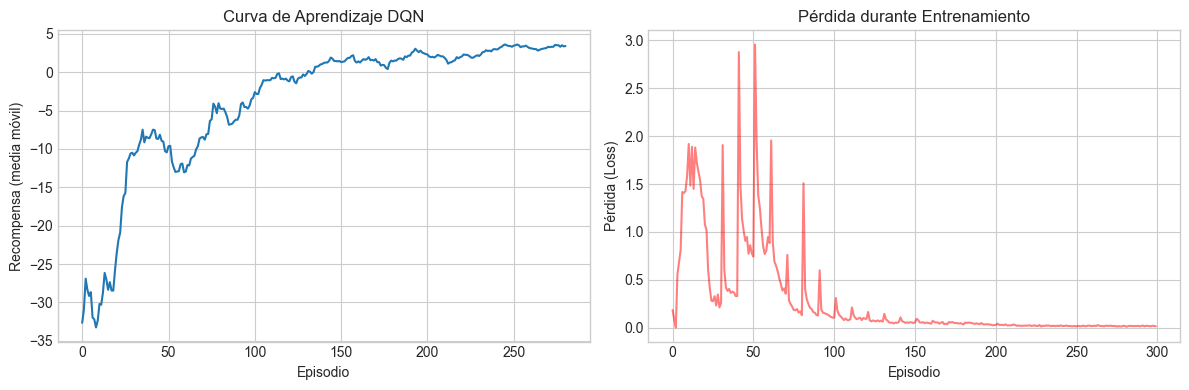


📊 DQN entrenado exitosamente
Recompensa promedio final: 3.28


In [12]:
# EJEMPLO PRÁCTICO 10: Entrenar DQN en GridWorld

if not TORCH_AVAILABLE:
    print("⚠️ PyTorch no disponible. Salta esta celda.")
else:
    def entrenar_dqn(env, n_episodios=300):
        """Entrena un agente DQN"""
        agente = AgenteDQN(input_size=2, n_acciones=4)
        
        recompensas_historial = []
        perdidas_historial = []
        
        for episodio in range(n_episodios):
            estado = env.reset()
            recompensa_total = 0
            perdida_total = 0
            pasos = 0
            
            for _ in range(100):
                accion = agente.seleccionar_accion(estado)
                siguiente, recompensa, terminado = env.step(accion)
                
                agente.recordar(estado, accion, recompensa, siguiente, terminado)
                perdida = agente.entrenar(batch_size=32)
                
                recompensa_total += recompensa
                perdida_total += perdida
                pasos += 1
                estado = siguiente
                
                if terminado:
                    break
            
            # Actualizar target network cada 10 episodios
            if episodio % 10 == 0:
                agente.actualizar_target()
            
            agente.decay_epsilon()
            
            recompensas_historial.append(recompensa_total)
            perdidas_historial.append(perdida_total / max(pasos, 1))
            
            if episodio % 50 == 0:
                promedio = np.mean(recompensas_historial[-50:]) if len(recompensas_historial) >= 50 else np.mean(recompensas_historial)
                print(f"Episodio {episodio:3d} | Recompensa: {recompensa_total:6.1f} | "
                      f"Promedio: {promedio:6.2f} | ε: {agente.epsilon:.3f}")
        
        return agente, recompensas_historial, perdidas_historial


    # Entrenar
    print("=" * 60)
    print("ENTRENAMIENTO DQN")
    print("=" * 60)

    env = GridWorld()
    agente_dqn, recompensas_dqn, perdidas_dqn = entrenar_dqn(env, n_episodios=300)

    # Visualizar
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    window = 20
    recompensas_suav = np.convolve(recompensas_dqn, np.ones(window)/window, mode='valid')

    axes[0].plot(recompensas_suav)
    axes[0].set_xlabel('Episodio')
    axes[0].set_ylabel('Recompensa (media móvil)')
    axes[0].set_title('Curva de Aprendizaje DQN')

    axes[1].plot(perdidas_dqn, color='red', alpha=0.5)
    axes[1].set_xlabel('Episodio')
    axes[1].set_ylabel('Pérdida (Loss)')
    axes[1].set_title('Pérdida durante Entrenamiento')

    plt.tight_layout()
    plt.show()

    print(f"\n📊 DQN entrenado exitosamente")
    print(f"Recompensa promedio final: {np.mean(recompensas_dqn[-50:]):.2f}")

---
<a id='9-gymnasium'></a>
# 9. Gymnasium: Entornos de RL

## ¿Qué es Gymnasium?

**Gymnasium** (antes OpenAI Gym) es la librería estándar para crear y usar entornos de RL. Piensa en ella como el "framework de testing" del RL.

### ¿Por qué necesitamos Gymnasium?

1. **Estandarización**: Todos los entornos tienen la misma interfaz
2. **Reproducibilidad**: Fácil comparar algoritmos en los mismos entornos
3. **Benchmarks**: Entornos clásicos para medir el progreso
4. **Comunidad**: Miles de entornos disponibles

### Entornos Populares

| Categoría | Entornos | Descripción |
|-----------|----------|-------------|
| **Control Clásico** | CartPole, MountainCar, Pendulum, Acrobot | Problemas de física simples, ideales para empezar |
| **Box2D** | LunarLander, BipedalWalker, CarRacing | Física 2D más realista |
| **Atari** | Breakout, Pong, Space Invaders, 50+ juegos | Videojuegos clásicos |
| **MuJoCo** | Ant, Humanoid, HalfCheetah | Robótica 3D de alta fidelidad |
| **Toy Text** | FrozenLake, Taxi, Blackjack | Entornos de texto para debugging |

---

## La API de Gymnasium

### Ciclo Básico

```python
import gymnasium as gym

# 1. Crear el entorno
env = gym.make("CartPole-v1")

# 2. Reiniciar (obtener estado inicial)
observation, info = env.reset()

# 3. Bucle de interacción
for _ in range(1000):
    action = env.action_space.sample()  # Tu agente elegiría aquí
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()

# 4. Cerrar el entorno
env.close()
```

### Componentes de la API

| Método/Atributo | Descripción | Retorna |
|-----------------|-------------|---------|
| `env.reset()` | Reinicia el entorno | `(observation, info)` |
| `env.step(action)` | Ejecuta una acción | `(obs, reward, terminated, truncated, info)` |
| `env.observation_space` | Describe el espacio de observaciones | `Box`, `Discrete`, etc. |
| `env.action_space` | Describe el espacio de acciones | `Box`, `Discrete`, etc. |
| `env.close()` | Libera recursos | None |

### Terminated vs Truncated

- **terminated**: El episodio terminó por razones del entorno (ej: el poste cayó, llegaste a la meta)
- **truncated**: El episodio terminó por límite de tiempo (ej: máximo 500 pasos)

```python
done = terminated or truncated  # Para compatibilidad con código antiguo
```

---

## Espacios (Spaces)

Los espacios definen qué observaciones y acciones son válidas.

### Tipos de Espacios

| Tipo | Descripción | Ejemplo |
|------|-------------|---------|
| `Discrete(n)` | Enteros de 0 a n-1 | Acciones: izq/der = `Discrete(2)` |
| `Box(low, high, shape)` | Arreglo de floats | Observación 4D: `Box(-inf, inf, (4,))` |
| `MultiBinary(n)` | Array de 0s y 1s | Botones presionados: `MultiBinary(8)` |
| `MultiDiscrete([n1, n2])` | Múltiples discretos | Joystick: `MultiDiscrete([3, 3])` |
| `Dict({...})` | Diccionario de espacios | Observación compleja |
| `Tuple((s1, s2))` | Tupla de espacios | Múltiples sensores |

### Métodos Útiles de Espacios

```python
# Generar una muestra aleatoria válida
action = env.action_space.sample()

# Verificar si un valor está en el espacio
is_valid = env.observation_space.contains(obs)

# Obtener límites (para Box)
low = env.observation_space.low
high = env.observation_space.high
```

---

## Wrappers: Modificando Entornos

Los wrappers permiten modificar el comportamiento de un entorno sin cambiar su código.

### Wrappers Comunes

```python
from gymnasium.wrappers import (
    TimeLimit,           # Limita el número de pasos
    RecordVideo,         # Graba videos del entrenamiento
    RecordEpisodeStatistics,  # Registra estadísticas
    NormalizeObservation,     # Normaliza observaciones
    ClipReward,          # Limita recompensas a [-1, 1]
)

# Ejemplo: Limitar episodio a 200 pasos
env = gym.make("CartPole-v1")
env = TimeLimit(env, max_episode_steps=200)

# Ejemplo: Grabar video cada 100 episodios
env = RecordVideo(env, "videos/", episode_trigger=lambda x: x % 100 == 0)
```

---

## Renderizado (Visualización)

```python
# Render en tiempo real (abre ventana)
env = gym.make("CartPole-v1", render_mode="human")

# Render como imagen RGB (para grabar)
env = gym.make("CartPole-v1", render_mode="rgb_array")
frame = env.render()  # Retorna array numpy

# Sin renderizado (más rápido para entrenar)
env = gym.make("CartPole-v1")  # Sin render_mode
```

**Tip**: Usa `render_mode="human"` solo para demos. Para entrenar, no renderices (es mucho más rápido).

In [13]:
# EJEMPLO PRÁCTICO 11: Explorando Gymnasium

# Instalar gymnasium si no está disponible
try:
    import gymnasium as gym
except ModuleNotFoundError:
    print("Instalando gymnasium...")
    !pip install gymnasium -q
    import gymnasium as gym

print("=" * 60)
print("EXPLORANDO GYMNASIUM")
print("=" * 60)

# Crear entorno CartPole
env = gym.make("CartPole-v1")

print("\n📦 Entorno: CartPole-v1")
print("-" * 40)
print(f"Espacio de observación: {env.observation_space}")
print(f"  - Tipo: {type(env.observation_space).__name__}")
print(f"  - Forma: {env.observation_space.shape}")
print(f"  - Límites: {env.observation_space.low} a {env.observation_space.high}")

print(f"\nEspacio de acciones: {env.action_space}")
print(f"  - Número de acciones: {env.action_space.n}")
print(f"  - Acciones: 0 = empujar izquierda, 1 = empujar derecha")

# Reset
observacion, info = env.reset(seed=42)
print(f"\n🔄 Después de reset():")
print(f"  Observación: {observacion}")
print(f"  Info: {info}")

# Un paso
accion = env.action_space.sample()
obs, reward, terminated, truncated, info = env.step(accion)

print(f"\n⚡ Después de step({accion}):")
print(f"  Nueva observación: {obs}")
print(f"  Recompensa: {reward}")
print(f"  Terminado: {terminated}")
print(f"  Truncado: {truncated}")

env.close()

# Significado de la observación en CartPole
print("\n" + "=" * 60)
print("SIGNIFICADO DE LA OBSERVACIÓN EN CARTPOLE")
print("=" * 60)
print("""
La observación es un vector de 4 valores:
  [0] Posición del carro     (-4.8 a 4.8)
  [1] Velocidad del carro    (-∞ a ∞)
  [2] Ángulo del poste       (-0.42 rad a 0.42 rad)
  [3] Velocidad angular      (-∞ a ∞)

Objetivo: Mantener el poste en equilibrio
Recompensa: +1 por cada paso que el poste sigue en pie
Termina cuando:
  - El poste se inclina más de 12°
  - El carro sale del límite
  - Se alcanzan 500 pasos (éxito)
""")

EXPLORANDO GYMNASIUM

📦 Entorno: CartPole-v1
----------------------------------------
Espacio de observación: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
  - Tipo: Box
  - Forma: (4,)
  - Límites: [-4.8               -inf -0.41887903        -inf] a [4.8               inf 0.41887903        inf]

Espacio de acciones: Discrete(2)
  - Número de acciones: 2
  - Acciones: 0 = empujar izquierda, 1 = empujar derecha

🔄 Después de reset():
  Observación: [ 0.0273956  -0.00611216  0.03585979  0.0197368 ]
  Info: {}

⚡ Después de step(0):
  Nueva observación: [ 0.02727336 -0.20172954  0.03625453  0.32351476]
  Recompensa: 1.0
  Terminado: False
  Truncado: False

SIGNIFICADO DE LA OBSERVACIÓN EN CARTPOLE

La observación es un vector de 4 valores:
  [0] Posición del carro     (-4.8 a 4.8)
  [1] Velocidad del carro    (-∞ a ∞)
  [2] Ángulo del poste       (-0.42 rad a 0.42 rad)
  [3] Velocidad angular      (-∞ a ∞)

Objetivo: 

In [14]:
# EJEMPLO PRÁCTICO 12: Probando diferentes entornos

# Asegurarse de que gym está importado
try:
    gym
except NameError:
    import gymnasium as gym

# Entornos que siempre están disponibles (sin dependencias extra)
entornos_basicos = [
    ("CartPole-v1", "Equilibrar un poste sobre un carro"),
    ("MountainCar-v0", "Subir un coche a la cima de una montaña"),
    ("Acrobot-v1", "Balancear un brazo robótico hacia arriba"),
]

# Entornos que requieren dependencias adicionales
entornos_extra = [
    ("LunarLander-v3", "Aterrizar una nave espacial (requiere: pip install gymnasium[box2d])"),
]

print("=" * 70)
print("ENTORNOS POPULARES DE GYMNASIUM")
print("=" * 70)

for nombre, descripcion in entornos_basicos:
    try:
        env = gym.make(nombre)
        print(f"\n📦 {nombre}")
        print(f"   {descripcion}")
        print(f"   Observaciones: {env.observation_space}")
        print(f"   Acciones: {env.action_space}")
        
        # Probar un episodio aleatorio
        obs, _ = env.reset()
        recompensa_total = 0
        pasos = 0
        
        for _ in range(200):
            accion = env.action_space.sample()
            obs, recompensa, terminado, truncado, _ = env.step(accion)
            recompensa_total += recompensa
            pasos += 1
            if terminado or truncado:
                break
        
        print(f"   Prueba aleatoria: {pasos} pasos, recompensa = {recompensa_total:.1f}")
        env.close()
        
    except Exception as e:
        print(f"\n⚠️ {nombre}: Error - {e}")

# Intentar entornos extra
print("\n" + "-" * 70)
print("ENTORNOS ADICIONALES (requieren instalación extra)")
print("-" * 70)

for nombre, descripcion in entornos_extra:
    try:
        env = gym.make(nombre)
        print(f"\n✅ {nombre} - Disponible")
        print(f"   {descripcion}")
        print(f"   Observaciones: {env.observation_space}")
        print(f"   Acciones: {env.action_space}")
        env.close()
    except Exception as e:
        print(f"\n❌ {nombre} - No instalado")
        print(f"   {descripcion}")

print("\n" + "=" * 70)
print("💡 Para instalar entornos adicionales:")
print("   pip install gymnasium[box2d]    # LunarLander, BipedalWalker")
print("   pip install gymnasium[atari]    # Juegos Atari")
print("=" * 70)

ENTORNOS POPULARES DE GYMNASIUM

📦 CartPole-v1
   Equilibrar un poste sobre un carro
   Observaciones: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
   Acciones: Discrete(2)
   Prueba aleatoria: 14 pasos, recompensa = 14.0

📦 MountainCar-v0
   Subir un coche a la cima de una montaña
   Observaciones: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
   Acciones: Discrete(3)
   Prueba aleatoria: 200 pasos, recompensa = -200.0

📦 Acrobot-v1
   Balancear un brazo robótico hacia arriba
   Observaciones: Box([ -1.        -1.        -1.        -1.       -12.566371 -28.274334], [ 1.        1.        1.        1.       12.566371 28.274334], (6,), float32)
   Acciones: Discrete(3)
   Prueba aleatoria: 200 pasos, recompensa = -200.0

----------------------------------------------------------------------
ENTORNOS ADICIONALES (requieren instalación extra)
----------------------------------------------------------------------

❌ Lu

---
<a id='10-practica'></a>
# 10. Práctica Final

## Objetivo

**Entrega un Jupyter Notebook donde cargues un environment de Gymnasium y entrenes un bot que aprenda a resolver la tarea.**

---

## Pasos Recomendados

### Paso 1: Elegir un Entorno

| Dificultad | Entorno | Descripción | Algoritmo Recomendado |
|------------|---------|-------------|----------------------|
| ⭐ Fácil | `CartPole-v1` | Equilibrar un poste | Q-Learning (discretizado) o DQN |
| ⭐ Fácil | `FrozenLake-v1` | Navegar en hielo | Q-Learning tabular |
| ⭐⭐ Media | `MountainCar-v0` | Subir una colina | DQN (recompensa sparse) |
| ⭐⭐ Media | `LunarLander-v3` | Aterrizar nave | DQN o PPO (requiere box2d) |
| ⭐⭐⭐ Difícil | `Acrobot-v1` | Balancear robot | DQN con buen diseño |

### Paso 2: Analizar el Entorno

Antes de implementar nada, entiende tu entorno:

```python
import gymnasium as gym

env = gym.make("TU_ENTORNO")
print(f"Observaciones: {env.observation_space}")
print(f"Acciones: {env.action_space}")

# Ejecuta varios episodios aleatorios para entender el problema
obs, _ = env.reset()
for _ in range(100):
    action = env.action_space.sample()
    obs, reward, term, trunc, info = env.step(action)
    print(f"Obs: {obs}, Reward: {reward}")
    if term or trunc:
        break
```

**Preguntas a responder:**
- ¿Cuántas dimensiones tiene la observación?
- ¿Cuántas acciones hay?
- ¿Cuándo termina un episodio?
- ¿Cómo es la estructura de recompensas?

### Paso 3: Diseñar el Agente

Elige tu enfoque:

| Enfoque | Cuándo usarlo | Complejidad |
|---------|---------------|-------------|
| **Q-Learning Tabular** | Estados discretos (FrozenLake, Taxi) | Baja |
| **Q-Learning + Discretización** | Estados continuos simples (CartPole) | Media |
| **DQN** | Estados continuos, más dimensiones | Alta |
| **Stable-Baselines3** | Cualquier entorno, sin implementar desde cero | Baja (usar librería) |

### Paso 4: Entrenar y Visualizar

Tu notebook debe incluir:

1. **Curva de aprendizaje**: Recompensa vs episodio
2. **Métricas**: Recompensa promedio, desviación estándar
3. **Evaluación final**: Ejecutar el agente entrenado sin exploración

### Paso 5: Analizar Resultados

Responde en tu notebook:
- ¿El agente aprendió? ¿Cómo lo sabes?
- ¿Qué hiperparámetros probaste?
- ¿Qué cambiarías para mejorarlo?

---

## Requisitos del Entregable

| Requisito | Puntos | Descripción |
|-----------|--------|-------------|
| Código funcional | 30% | El notebook ejecuta sin errores y entrena un agente |
| Curvas de aprendizaje | 20% | Gráfica que muestra mejora del agente |
| Evaluación | 20% | Demostrar el agente final funcionando |
| Documentación | 20% | Explicar decisiones, hiperparámetros, resultados |
| Creatividad | 10% | Entorno diferente, mejoras al algoritmo, análisis extra |

---

## Opción A: Implementación Desde Cero

Si quieres entender los algoritmos a fondo, implementa tu propio agente.

### Plantilla Q-Learning con Discretización (CartPole)

In [15]:
# ============================================================
# PRÁCTICA FINAL: REINFORCEMENT LEARNING
# ============================================================
# Nombre: [TU NOMBRE]
# Fecha: [FECHA]
# Entorno elegido: [NOMBRE DEL ENTORNO]
# ============================================================

# Imports necesarios (gymnasium ya debería estar instalado)
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque, defaultdict
import random

# Opcional: Para DQN (descomenta si lo usas)
# import torch
# import torch.nn as nn
# import torch.optim as optim

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [16]:
# PASO 1: Cargar y explorar el entorno
# ============================================================

# TODO: Elige tu entorno
env = gym.make("CartPole-v1")  # Cambia esto si quieres otro entorno

print("=" * 50)
print("ANÁLISIS DEL ENTORNO")
print("=" * 50)

# TODO: Analiza el espacio de estados y acciones
print(f"Espacio de observación: {env.observation_space}")
print(f"Espacio de acciones: {env.action_space}")

# TODO: Describe qué significa cada observación y acción

ANÁLISIS DEL ENTORNO
Espacio de observación: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Espacio de acciones: Discrete(2)


In [17]:
# PASO 2: Implementar el agente
# ============================================================

# TODO: Implementa tu agente aquí
# Puedes usar Q-Learning (con discretización), DQN, o tu propio algoritmo

class MiAgente:
    def __init__(self, env):
        # TODO: Inicializa tu agente
        pass
    
    def seleccionar_accion(self, estado):
        # TODO: Implementa la selección de acción
        pass
    
    def aprender(self, estado, accion, recompensa, siguiente_estado, terminado):
        # TODO: Implementa el algoritmo de aprendizaje
        pass

In [18]:
# PASO 3: Entrenar el agente
# ============================================================

def entrenar(env, agente, n_episodios=500):
    """Función de entrenamiento"""
    recompensas = []
    
    for episodio in range(n_episodios):
        estado, _ = env.reset()
        recompensa_total = 0
        terminado = False
        truncado = False
        
        while not (terminado or truncado):
            # TODO: Completa el bucle de entrenamiento
            accion = agente.seleccionar_accion(estado)
            siguiente, recompensa, terminado, truncado, _ = env.step(accion)
            
            agente.aprender(estado, accion, recompensa, siguiente, terminado or truncado)
            
            estado = siguiente
            recompensa_total += recompensa
        
        recompensas.append(recompensa_total)
        
        if episodio % 100 == 0:
            print(f"Episodio {episodio}: Recompensa = {recompensa_total:.1f}")
    
    return recompensas

# TODO: Entrena tu agente
# agente = MiAgente(env)
# recompensas = entrenar(env, agente)

In [19]:
# PASO 4: Visualizar resultados
# ============================================================

# TODO: Grafica las curvas de aprendizaje

# plt.figure(figsize=(10, 5))
# plt.plot(recompensas)
# plt.xlabel('Episodio')
# plt.ylabel('Recompensa')
# plt.title('Curva de Aprendizaje')
# plt.show()

In [20]:
# PASO 5: Evaluar el agente entrenado
# ============================================================

def evaluar(env, agente, n_episodios=10):
    """Evalúa el agente sin exploración"""
    recompensas = []
    
    for _ in range(n_episodios):
        estado, _ = env.reset()
        recompensa_total = 0
        terminado = False
        truncado = False
        
        while not (terminado or truncado):
            # TODO: Evalúa sin exploración (greedy)
            accion = agente.seleccionar_accion(estado)  # Sin epsilon
            estado, recompensa, terminado, truncado, _ = env.step(accion)
            recompensa_total += recompensa
        
        recompensas.append(recompensa_total)
    
    print(f"Evaluación: {np.mean(recompensas):.1f} ± {np.std(recompensas):.1f}")
    return recompensas

# TODO: Evalúa tu agente
# evaluar(env, agente)

---

## Opción B: Usando Stable-Baselines3 (Recomendado para principiantes)

Si prefieres enfocarte en entender RL sin implementar algoritmos desde cero, usa Stable-Baselines3.

### Instalación
```bash
pip install stable-baselines3
```

### Ejemplo Completo con PPO

```python
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import gymnasium as gym

# 1. Crear entorno
env = gym.make("CartPole-v1")

# 2. Crear agente
model = PPO(
    "MlpPolicy",        # Política con red neuronal
    env,
    learning_rate=0.0003,
    gamma=0.99,
    verbose=1           # Muestra progreso
)

# 3. Entrenar
model.learn(total_timesteps=50_000)

# 4. Evaluar
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Recompensa: {mean_reward:.2f} ± {std_reward:.2f}")

# 5. Guardar modelo
model.save("cartpole_ppo")

# 6. Demostración visual
env = gym.make("CartPole-v1", render_mode="human")
obs, _ = env.reset()
for _ in range(1000):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, _ = env.reset()
env.close()
```

---

## Criterios de Evaluación

| Criterio | Puntos |
|----------|--------|
| Código funcional que entrena un agente | 30% |
| Curvas de aprendizaje que muestran mejora | 20% |
| Evaluación del agente entrenado | 20% |
| Documentación y explicaciones | 20% |
| Creatividad (entorno diferente, mejoras al algoritmo) | 10% |

---

## Errores Comunes y Cómo Evitarlos

| Error | Causa | Solución |
|-------|-------|----------|
| El agente no mejora | Learning rate muy alto/bajo | Probar α = 0.001, 0.01, 0.1 |
| Recompensa oscila mucho | Epsilon muy alto al final | Reducir ε gradualmente hasta 0.01 |
| Se queda en óptimo local | Poca exploración inicial | Empezar con ε = 1.0 |
| Olvida lo aprendido | Buffer muy pequeño (DQN) | Aumentar tamaño del buffer |
| Entrenamiento muy lento | Renderizado activo | Quitar `render_mode="human"` |

---

## Tips Finales

1. **Empieza simple**: CartPole-v1 es perfecto para empezar
2. **Loggea todo**: Guarda métricas para analizar después
3. **Usa semillas**: `env.reset(seed=42)` para reproducibilidad
4. **Experimenta**: Cambia hiperparámetros y observa el efecto
5. **No te rindas**: El RL es difícil, los agentes a veces tardan en aprender

---

# Recursos Adicionales

## Libros (de más accesible a más avanzado)

| Libro | Autor | Nivel | Enlace |
|-------|-------|-------|--------|
| **Grokking Deep RL** | Miguel Morales | Principiante | Con código Python paso a paso |
| **RL: An Introduction** | Sutton & Barto | Intermedio | [Gratis online](http://incompleteideas.net/book/the-book-2nd.html) - EL libro clásico |
| **Deep RL Hands-On** | Maxim Lapan | Avanzado | Implementaciones prácticas con PyTorch |

## Cursos Online (Gratuitos)

| Curso | Plataforma | Descripción |
|-------|------------|-------------|
| **Deep RL Course** | Hugging Face | El mejor curso práctico actual, con certificado |
| **RL Specialization** | Coursera (Alberta) | Curso académico riguroso |
| **Spinning Up** | OpenAI | Documentación + código de referencia |
| **RL Course** | DeepMind x UCL | Lecturas en YouTube por expertos de DeepMind |

## Librerías Principales

| Librería | Uso | Instalación |
|----------|-----|-------------|
| **Gymnasium** | Entornos estándar | `pip install gymnasium` |
| **Stable-Baselines3** | Algoritmos listos para usar | `pip install stable-baselines3` |
| **RLlib** | RL escalable y distribuido | `pip install ray[rllib]` |
| **CleanRL** | Implementaciones simples y claras | `pip install cleanrl` |
| **TorchRL** | RL con PyTorch (oficial) | `pip install torchrl` |

## Papers Fundamentales

| Año | Paper | Contribución |
|-----|-------|--------------|
| 2013 | Playing Atari with Deep RL | Primer DQN exitoso |
| 2015 | Human-level control through deep RL | DQN en Nature, Experience Replay + Target Network |
| 2016 | Asynchronous Methods for Deep RL | A3C: Entrenamiento paralelo |
| 2017 | Proximal Policy Optimization | PPO: Algoritmo robusto y simple |
| 2018 | Soft Actor-Critic | SAC: Estado del arte en control continuo |

## Entornos Interesantes para Explorar

| Entorno | Instalación | Descripción |
|---------|-------------|-------------|
| Atari | `pip install gymnasium[atari,accept-rom-license]` | Videojuegos clásicos |
| Box2D | `pip install gymnasium[box2d]` | LunarLander, CarRacing |
| MuJoCo | `pip install gymnasium[mujoco]` | Robótica 3D (ahora gratuito) |
| Minigrid | `pip install minigrid` | Laberintos 2D personalizables |
| Highway | `pip install highway-env` | Conducción autónoma |
| PettingZoo | `pip install pettingzoo` | Multi-agente |

---

**¡Buena suerte con tu práctica!**

Recuerda: El RL requiere **paciencia**. Es normal que los agentes tarden en aprender o que los primeros intentos no funcionen. ¡Experimenta, ajusta hiperparámetros, y disfruta del proceso!